# Explore the stream at Embudo NM

In [1]:
%matplotlib inline

import gzip
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import spacepy.toolbox as tb
import spacepy.plot as spp
import pandas as pd



This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
dfile = 'Embudo_stream_ts_raw.txt.gz'

In [3]:
dat = pd.read_csv(dfile, skiprows=30, delimiter='\t', header=None, names=('agency', 'site','datetime', 'TZ', 
                                                                          'discharge', 'd_a', 'gague', 'g_a'))
print(dat[0:20])


   agency     site          datetime   TZ  discharge d_a  gague g_a
0    USGS  8279500  2007-10-01 00:15  MDT      536.0   A   3.25   A
1    USGS  8279500  2007-10-01 00:30  MDT      536.0   A   3.25   A
2    USGS  8279500  2007-10-01 00:45  MDT      536.0   A   3.25   A
3    USGS  8279500  2007-10-01 01:00  MDT      531.0   A   3.24   A
4    USGS  8279500  2007-10-01 01:15  MDT      531.0   A   3.24   A
5    USGS  8279500  2007-10-01 01:30  MDT      531.0   A   3.24   A
6    USGS  8279500  2007-10-01 01:45  MDT      531.0   A   3.24   A
7    USGS  8279500  2007-10-01 02:00  MDT      531.0   A   3.24   A
8    USGS  8279500  2007-10-01 02:15  MDT      526.0   A   3.23   A
9    USGS  8279500  2007-10-01 02:30  MDT      526.0   A   3.23   A
10   USGS  8279500  2007-10-01 02:45  MDT      526.0   A   3.23   A
11   USGS  8279500  2007-10-01 03:00  MDT      526.0   A   3.23   A
12   USGS  8279500  2007-10-01 03:15  MDT      522.0   A   3.22   A
13   USGS  8279500  2007-10-01 03:30  MDT      5

In [4]:
index = pd.DatetimeIndex(dat['datetime'] + " " + dat['TZ'], infer_datetime_format=True)
dat.set_index(index, inplace=True)
dat.drop('datetime', axis=1, inplace=True)
dat.drop('TZ', axis=1, inplace=True)
print(dat[:10])

                    agency     site  discharge d_a  gague g_a
2007-10-01 06:15:00   USGS  8279500      536.0   A   3.25   A
2007-10-01 06:30:00   USGS  8279500      536.0   A   3.25   A
2007-10-01 06:45:00   USGS  8279500      536.0   A   3.25   A
2007-10-01 07:00:00   USGS  8279500      531.0   A   3.24   A
2007-10-01 07:15:00   USGS  8279500      531.0   A   3.24   A
2007-10-01 07:30:00   USGS  8279500      531.0   A   3.24   A
2007-10-01 07:45:00   USGS  8279500      531.0   A   3.24   A
2007-10-01 08:00:00   USGS  8279500      531.0   A   3.24   A
2007-10-01 08:15:00   USGS  8279500      526.0   A   3.23   A
2007-10-01 08:30:00   USGS  8279500      526.0   A   3.23   A


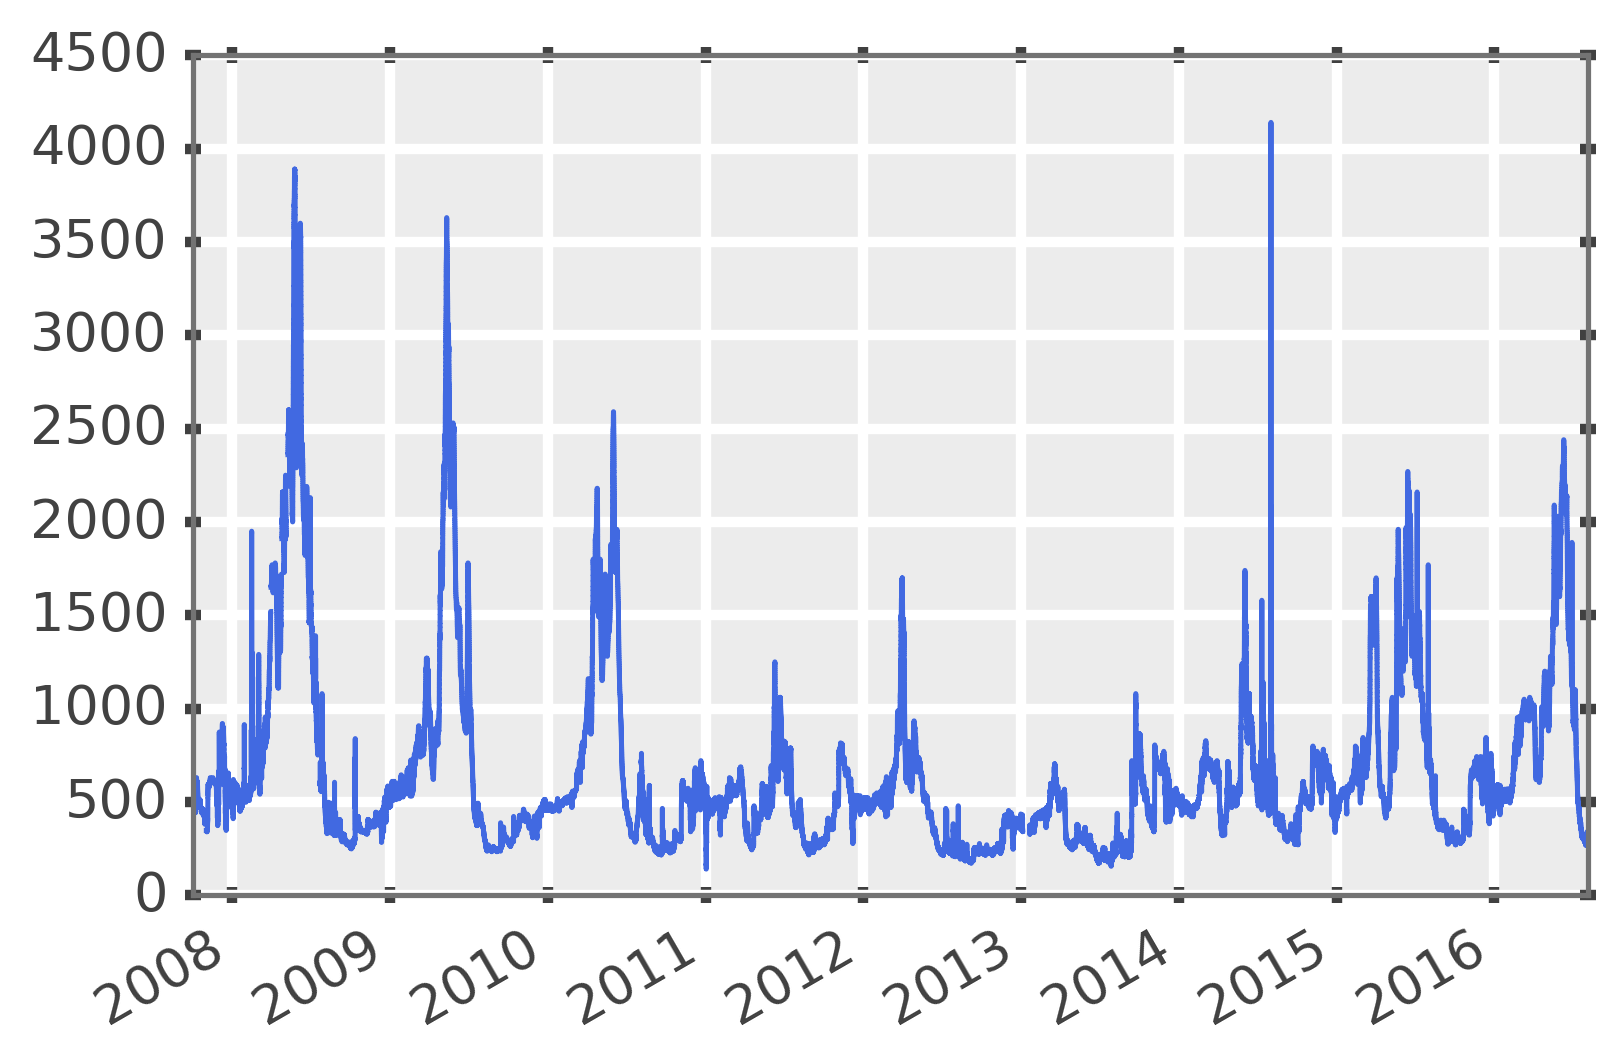

In [5]:
dat['discharge'].plot()

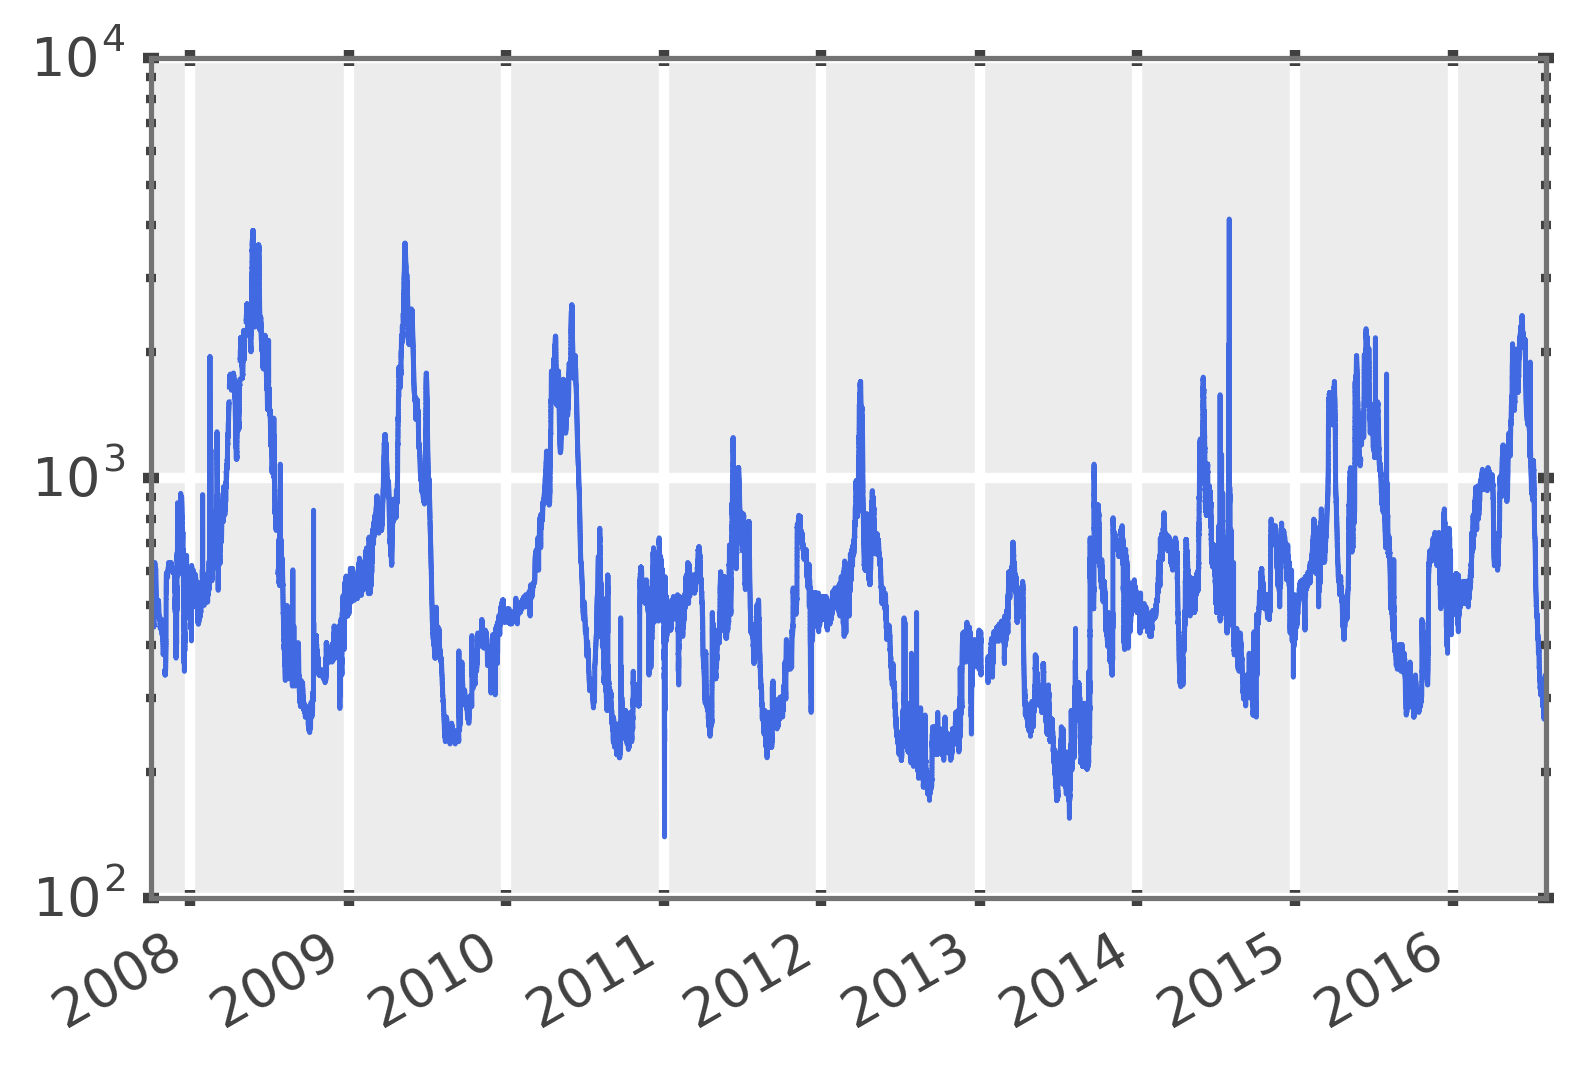

In [6]:
dat['discharge'].plot()
plt.yscale('log')

/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  if __name__ == '__main__':


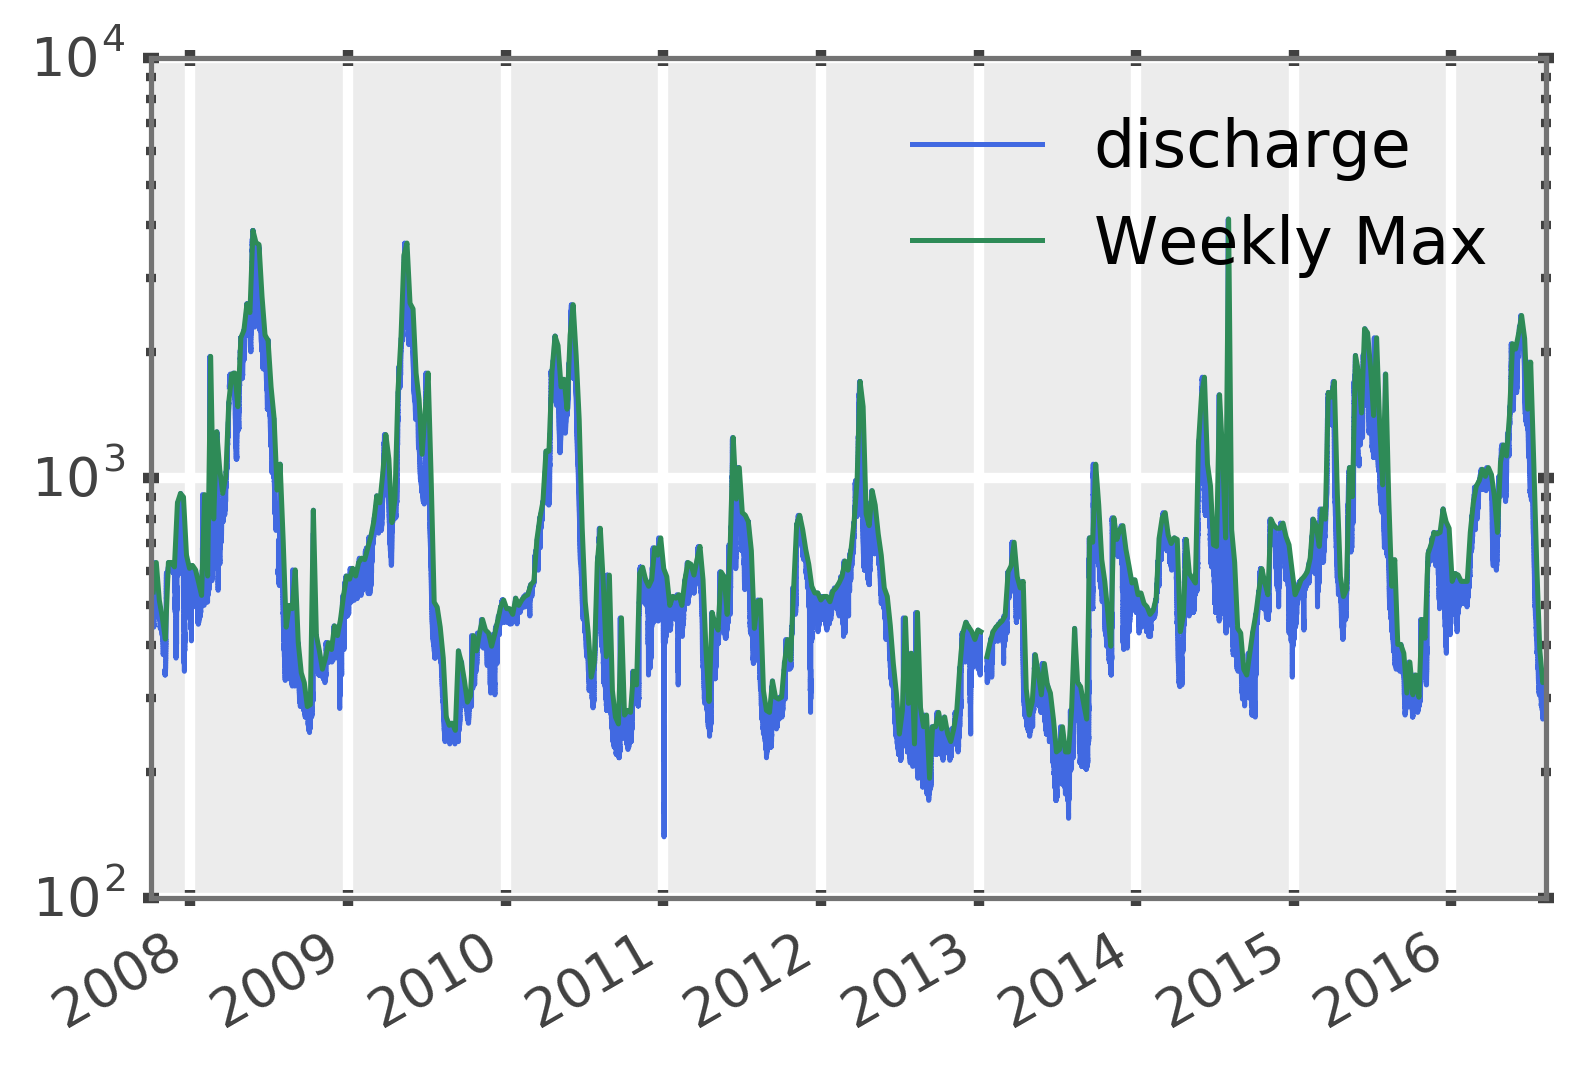

In [7]:
daily_max = dat['discharge'].resample('1w',how='max')
dat['discharge'].plot()
daily_max.plot(label='Weekly Max')
plt.yscale('log')
plt.legend()


nan nan


(array([ 24.,  47.,  44.,  53.,  67.,  43.,  35.,  29.,  15.,  12.,  12.,
          9.,   4.,   3.,   1.,   6.,   5.,   6.,   2.,   6.,   6.,   1.,
          3.,   2.,   6.,   5.,   2.,   0.,   2.,   1.,   3.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   3.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([  193.  ,   271.94,   350.88,   429.82,   508.76,   587.7 ,
          666.64,   745.58,   824.52,   903.46,   982.4 ,  1061.34,
         1140.28,  1219.22,  1298.16,  1377.1 ,  1456.04,  1534.98,
         1613.92,  1692.86,  1771.8 ,  1850.74,  1929.68,  2008.62,
         2087.56,  2166.5 ,  2245.44,  2324.38,  2403.32,  2482.26,
         2561.2 ,  2640.14,  2719.08,  2798.02,  2876.96,  2955.9 ,
         3034.84,  3113.78,  3192.72,  3271.66,  3350.6 ,  3429.54,
         3508.48,  3587.42,  3666.36,  3745.3 ,  3824.24,  3903.18,
         3982.12,  4061.06,  4140.  ]),
 <a list of 50 Patch objects>)

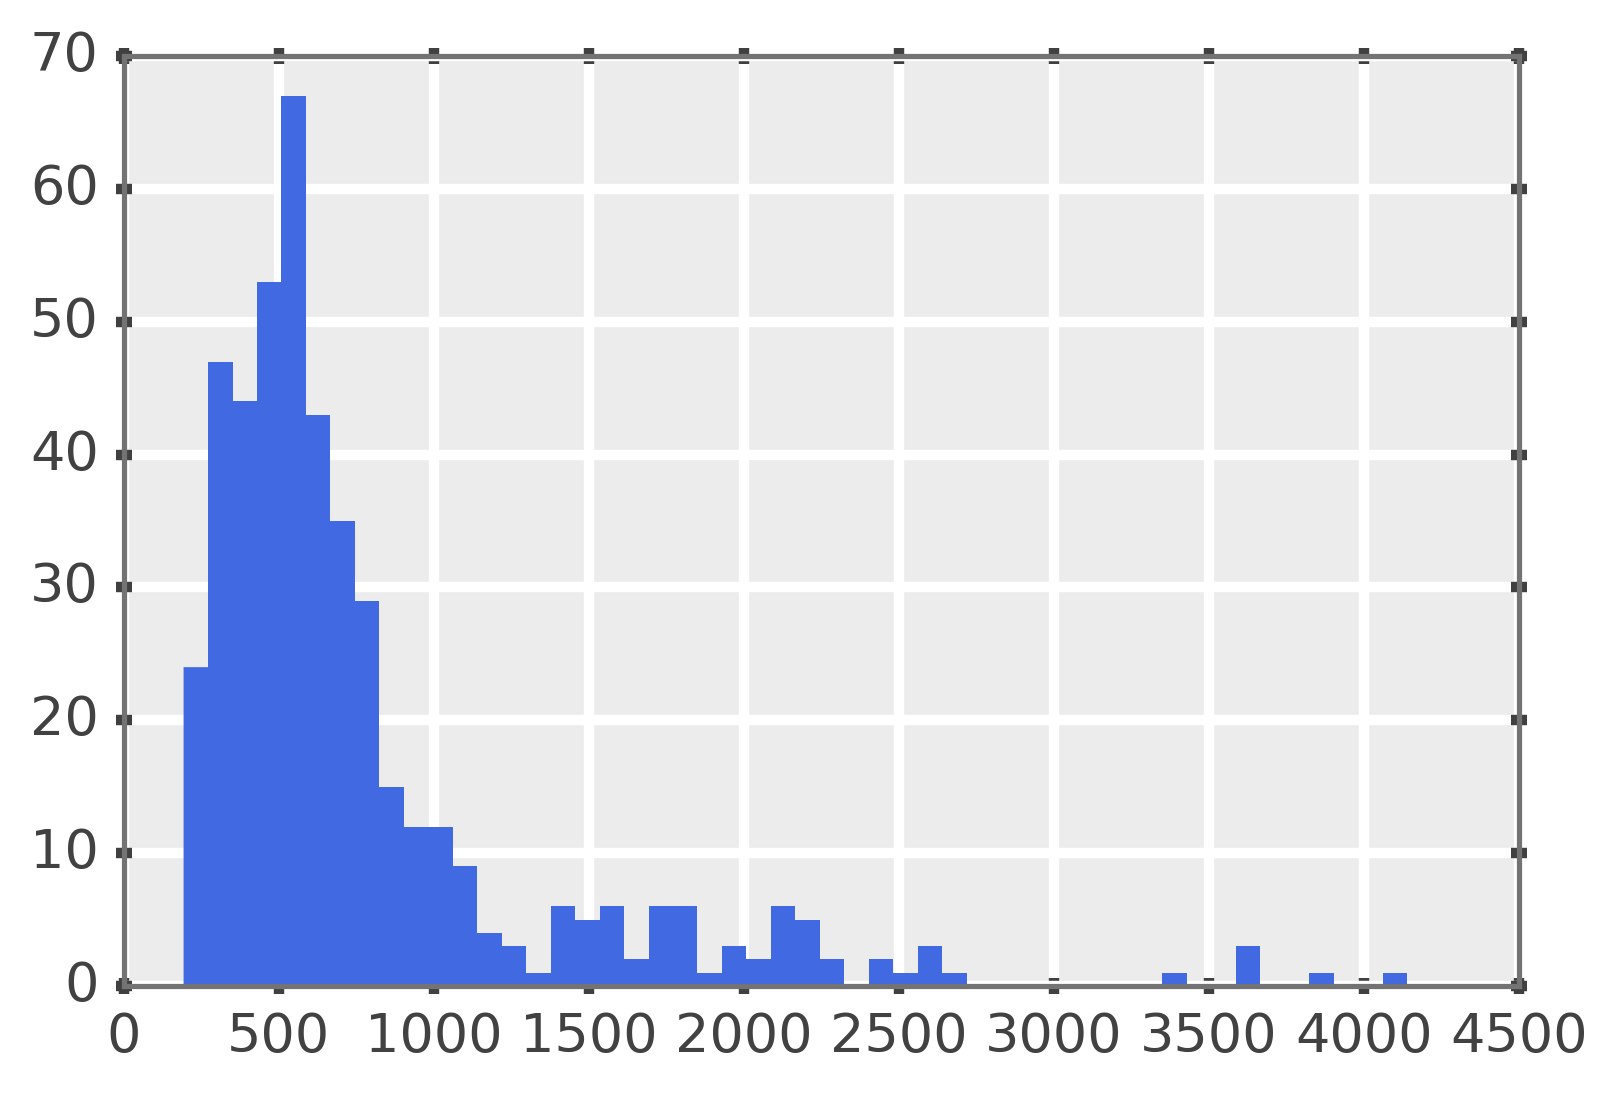

In [56]:
print(daily_max.as_matrix().min(), daily_max.as_matrix().max())
daily_max.as_matrix()
data_mcmc = daily_max.as_matrix()[~np.isnan(daily_max.as_matrix())]
plt.hist(data_mcmc, 50)

## Now we fit this to a Generalized extreme value using a Bayesian technique


In [9]:
import pymc


In [10]:
# Define the priors for the location (xi), scale (alpha) and shape (kappa)
# parameters.

xi = pymc.Uniform('xi', rseed=True, lower=daily_max.min(), upper=daily_max.max(), doc='Location parameter')

@pymc.deterministic(plot=True)
def alpha(xi=xi):
    """Scale parameter"""
    return 1./xi

kappa = pymc.Beta('kappa', rseed=True, alpha=5., beta=6., doc='Shape parameter')

# @pymc.data
# @pymc.stochastic_from_data('D', lower=0, upper=1e6, data=daily_max.as_matrix())
def D(value=data_mcmc, location=xi, scale=alpha, shape=kappa, lower=0, upper=1e6):
   return pymc.gev_like(value, shape, location, scale)


In [11]:
@pymc.stochastic_from_data

SyntaxError: unexpected EOF while parsing (<ipython-input-11-80832237b387>, line 1)

In [12]:
type(daily_max.min())

numpy.float64

In [13]:
model = pymc.MCMC((xi, alpha, kappa, D))

In [14]:
model.sample(iter=50000, verbose=True, burn_till_tuned=True)

burn_til_tuned is True. tune_throughout is set to False
	Tuning at iteration 1000
	Tuning at iteration 2000
	Tuning at iteration 3000
	Tuning at iteration 4000
	Tuning at iteration 5000

Finished tuning

Burn-in interval complete

Sampling finished normally.


{'alpha': {'95% HPD interval': array([ 0.00024155,  0.00256798]),
           'mc error': 3.4799941108286351e-06,
           'mean': 0.00077644952431352491,
           'n': 50000,
           'quantiles': {2.5: 0.00024748197402090562,
                         25: 0.00031631335756886133,
                         50: 0.00046103253316927804,
                         75: 0.00084810718163118456,
                         97.5: 0.0034274969590984117},
           'standard deviation': 0.00080557071318380837},
 'kappa': {'95% HPD interval': array([ 0.18189819,  0.72935284]),
           'mc error': 0.00064620277372009539,
           'mean': 0.45486017398097939,
           'n': 50000,
           'quantiles': {2.5: 0.18883310861653776,
                         25: 0.35077747414710964,
                         50: 0.45252729231038935,
                         75: 0.55608100430153651,
                         97.5: 0.73641312496191036},
           'standard deviation': 0.14356556538390214},
 'xi': {'9

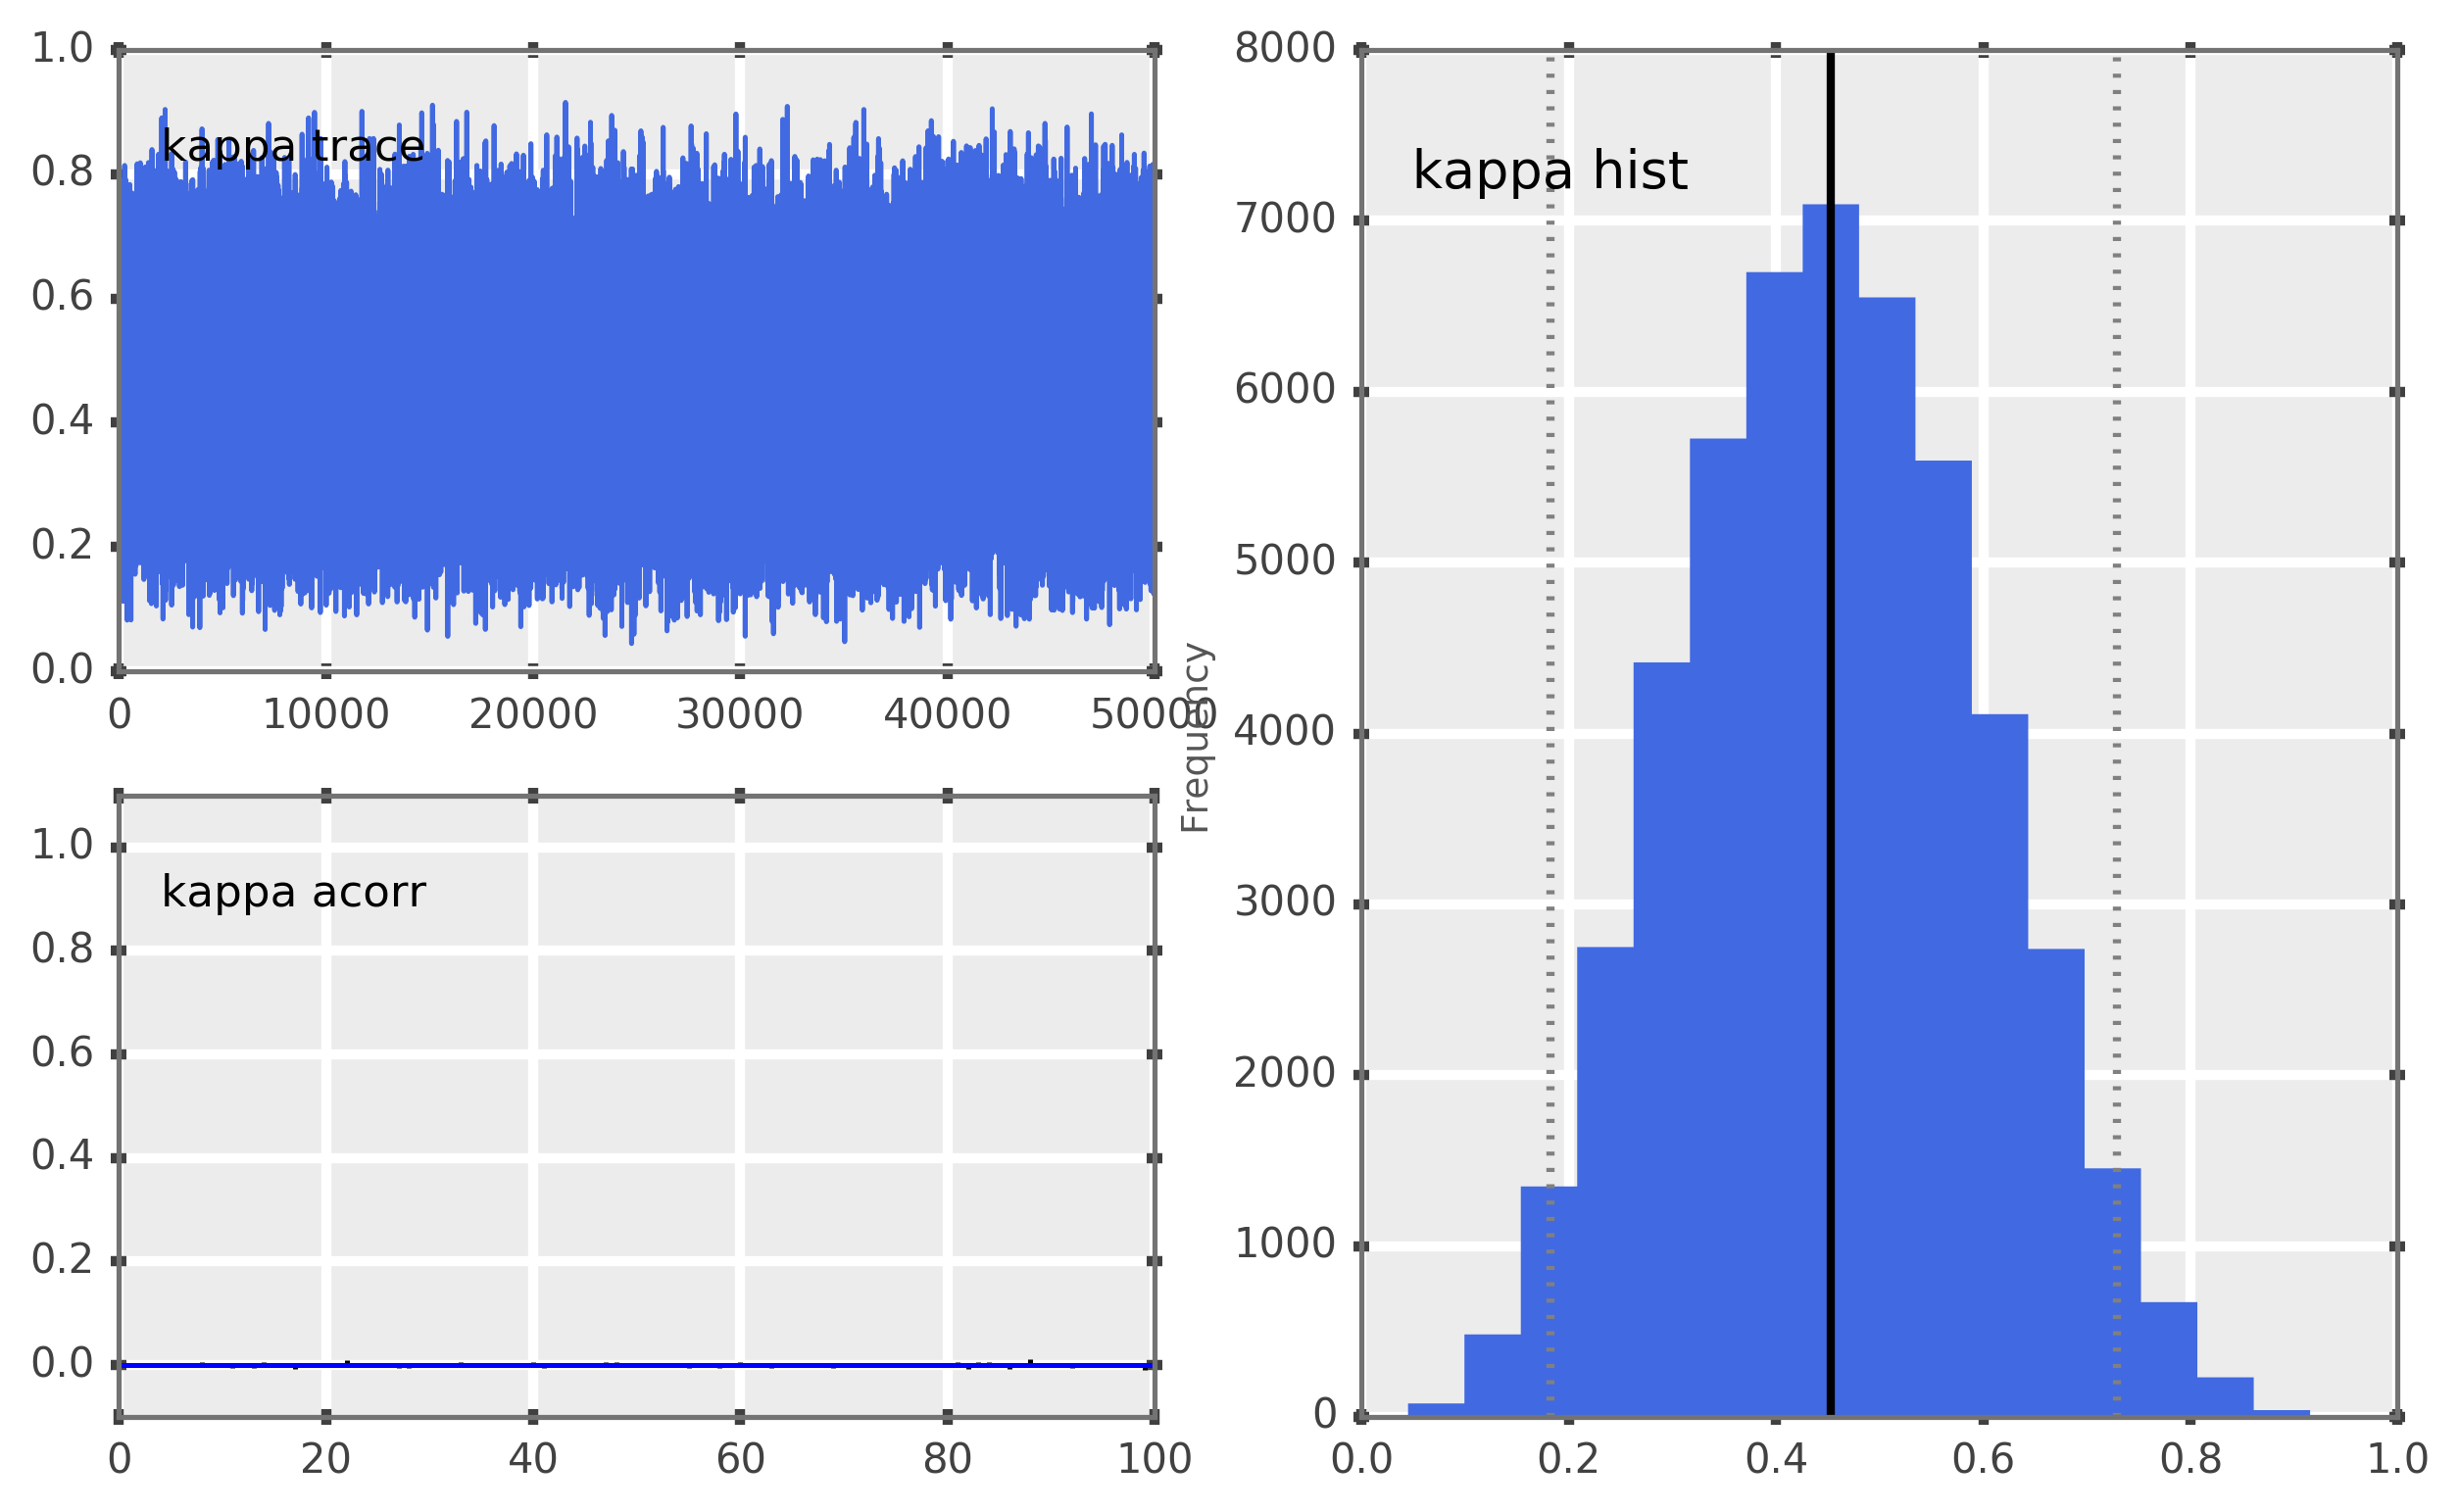

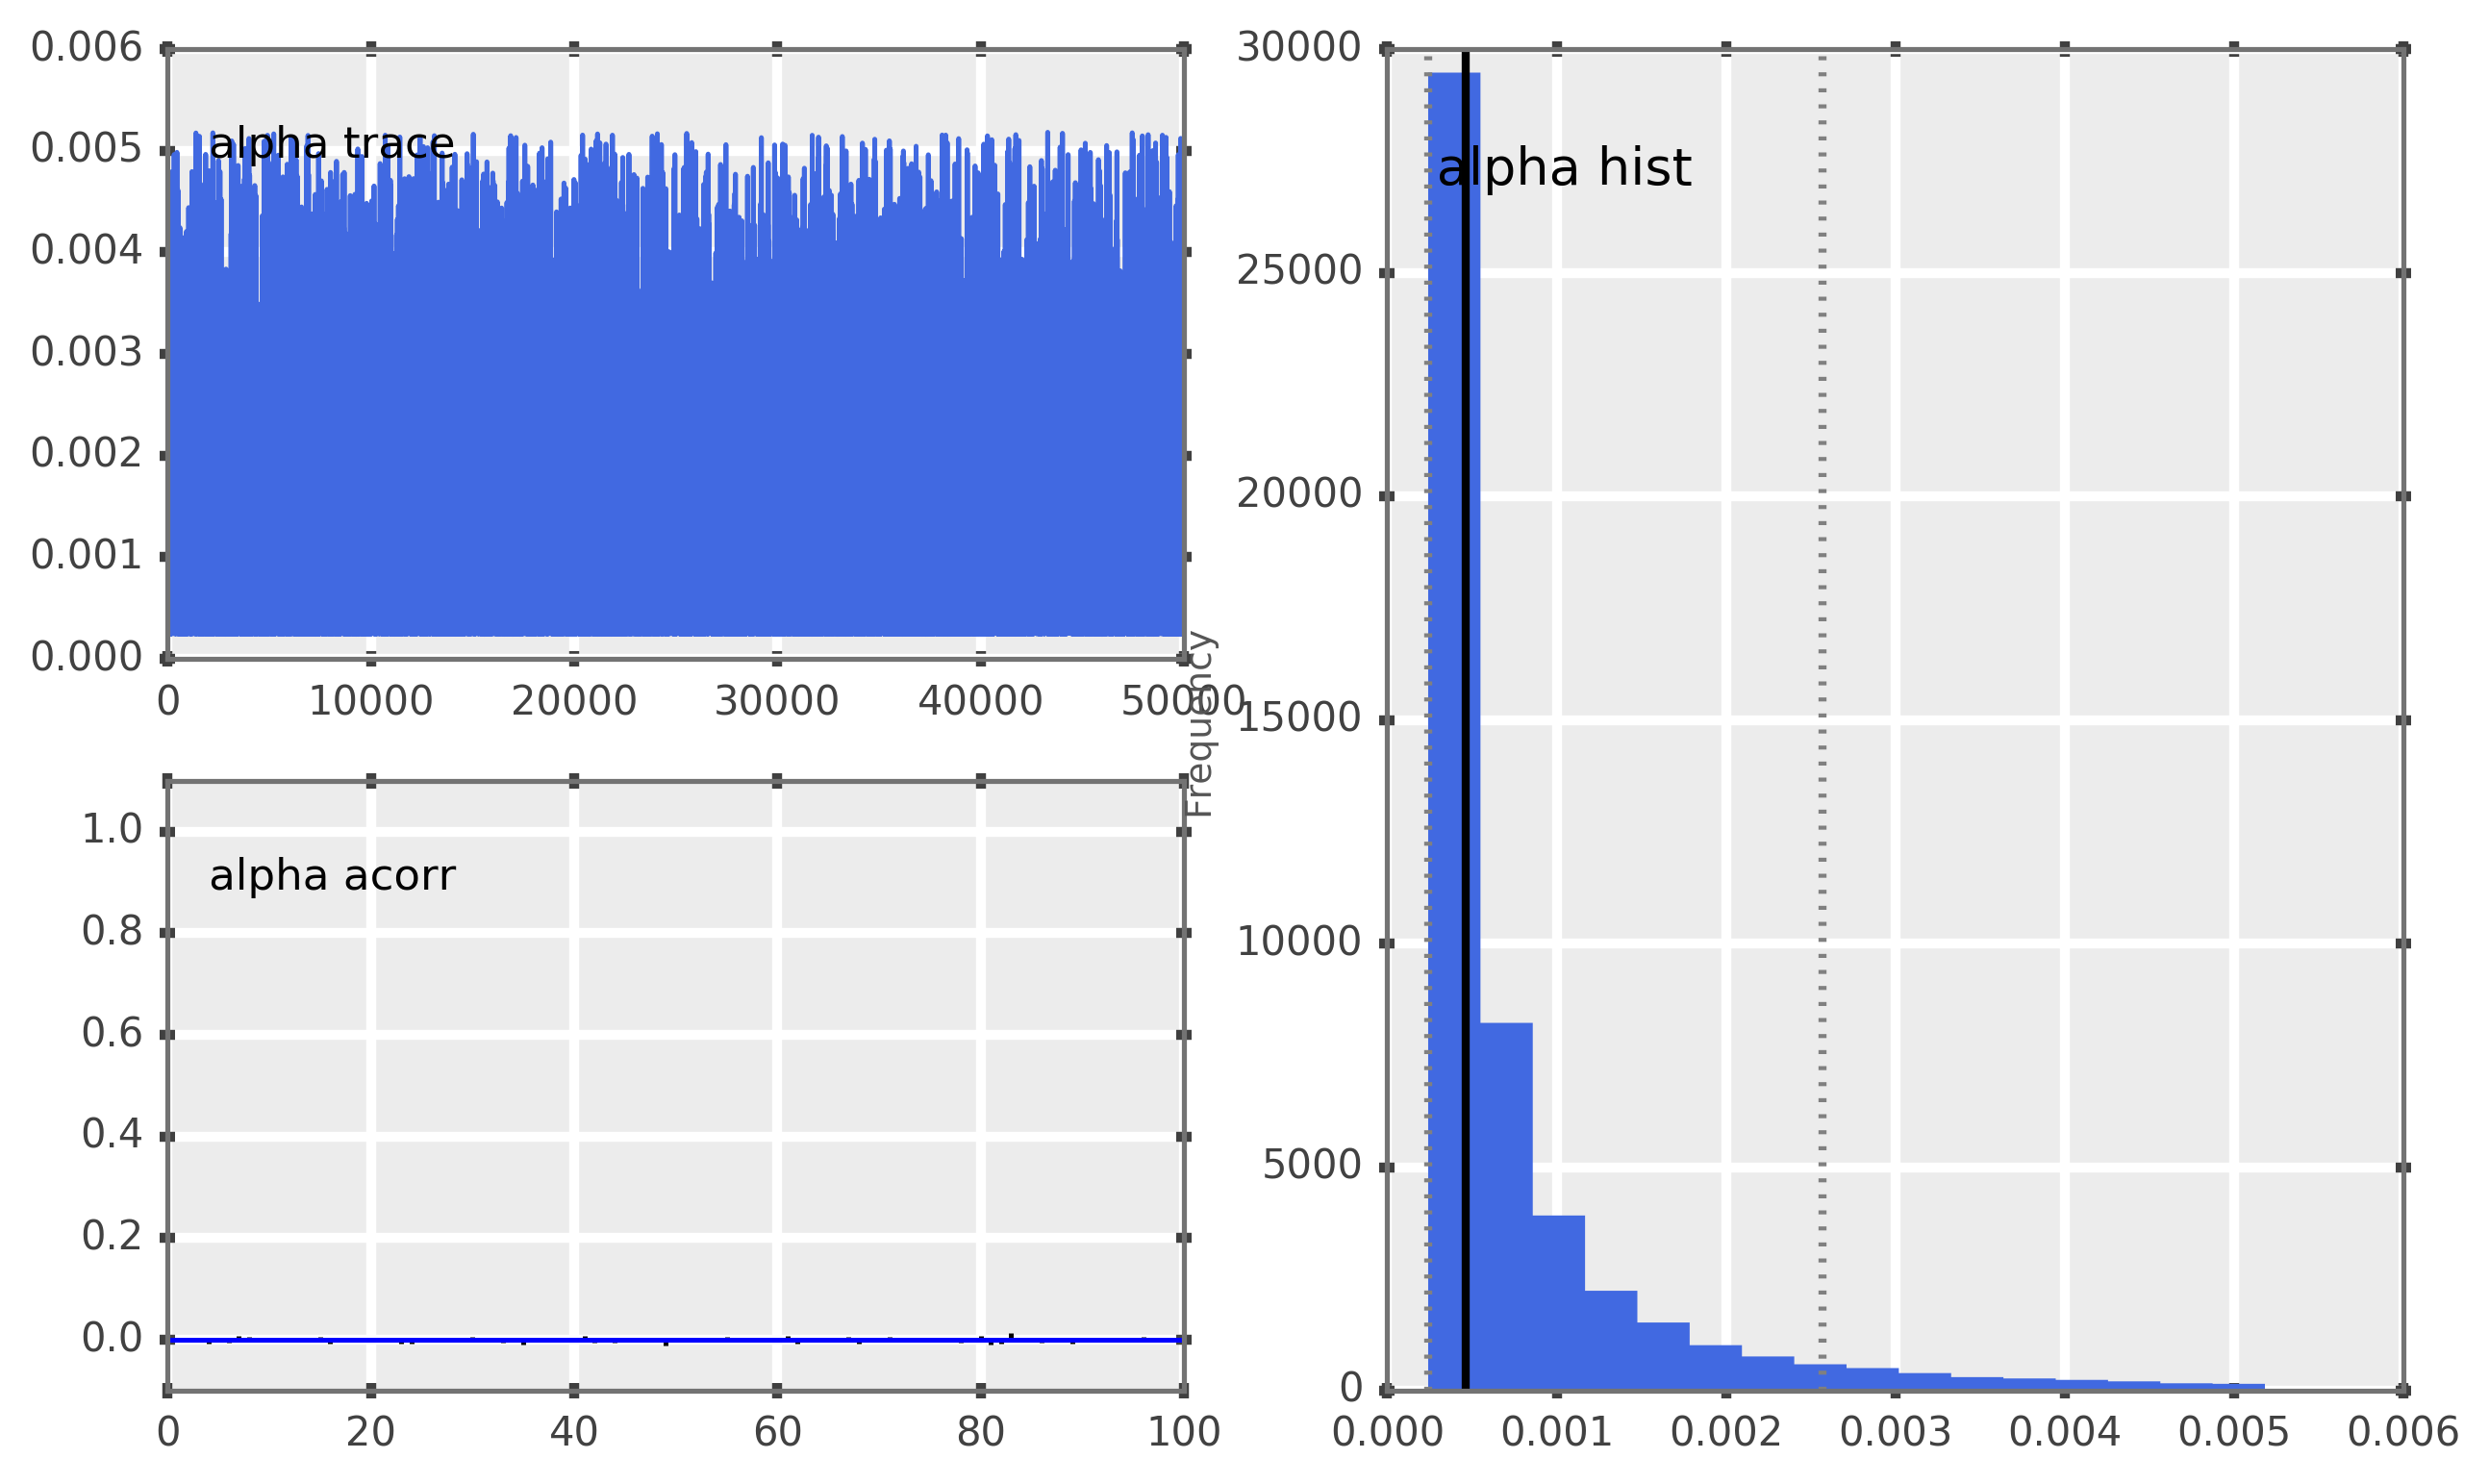

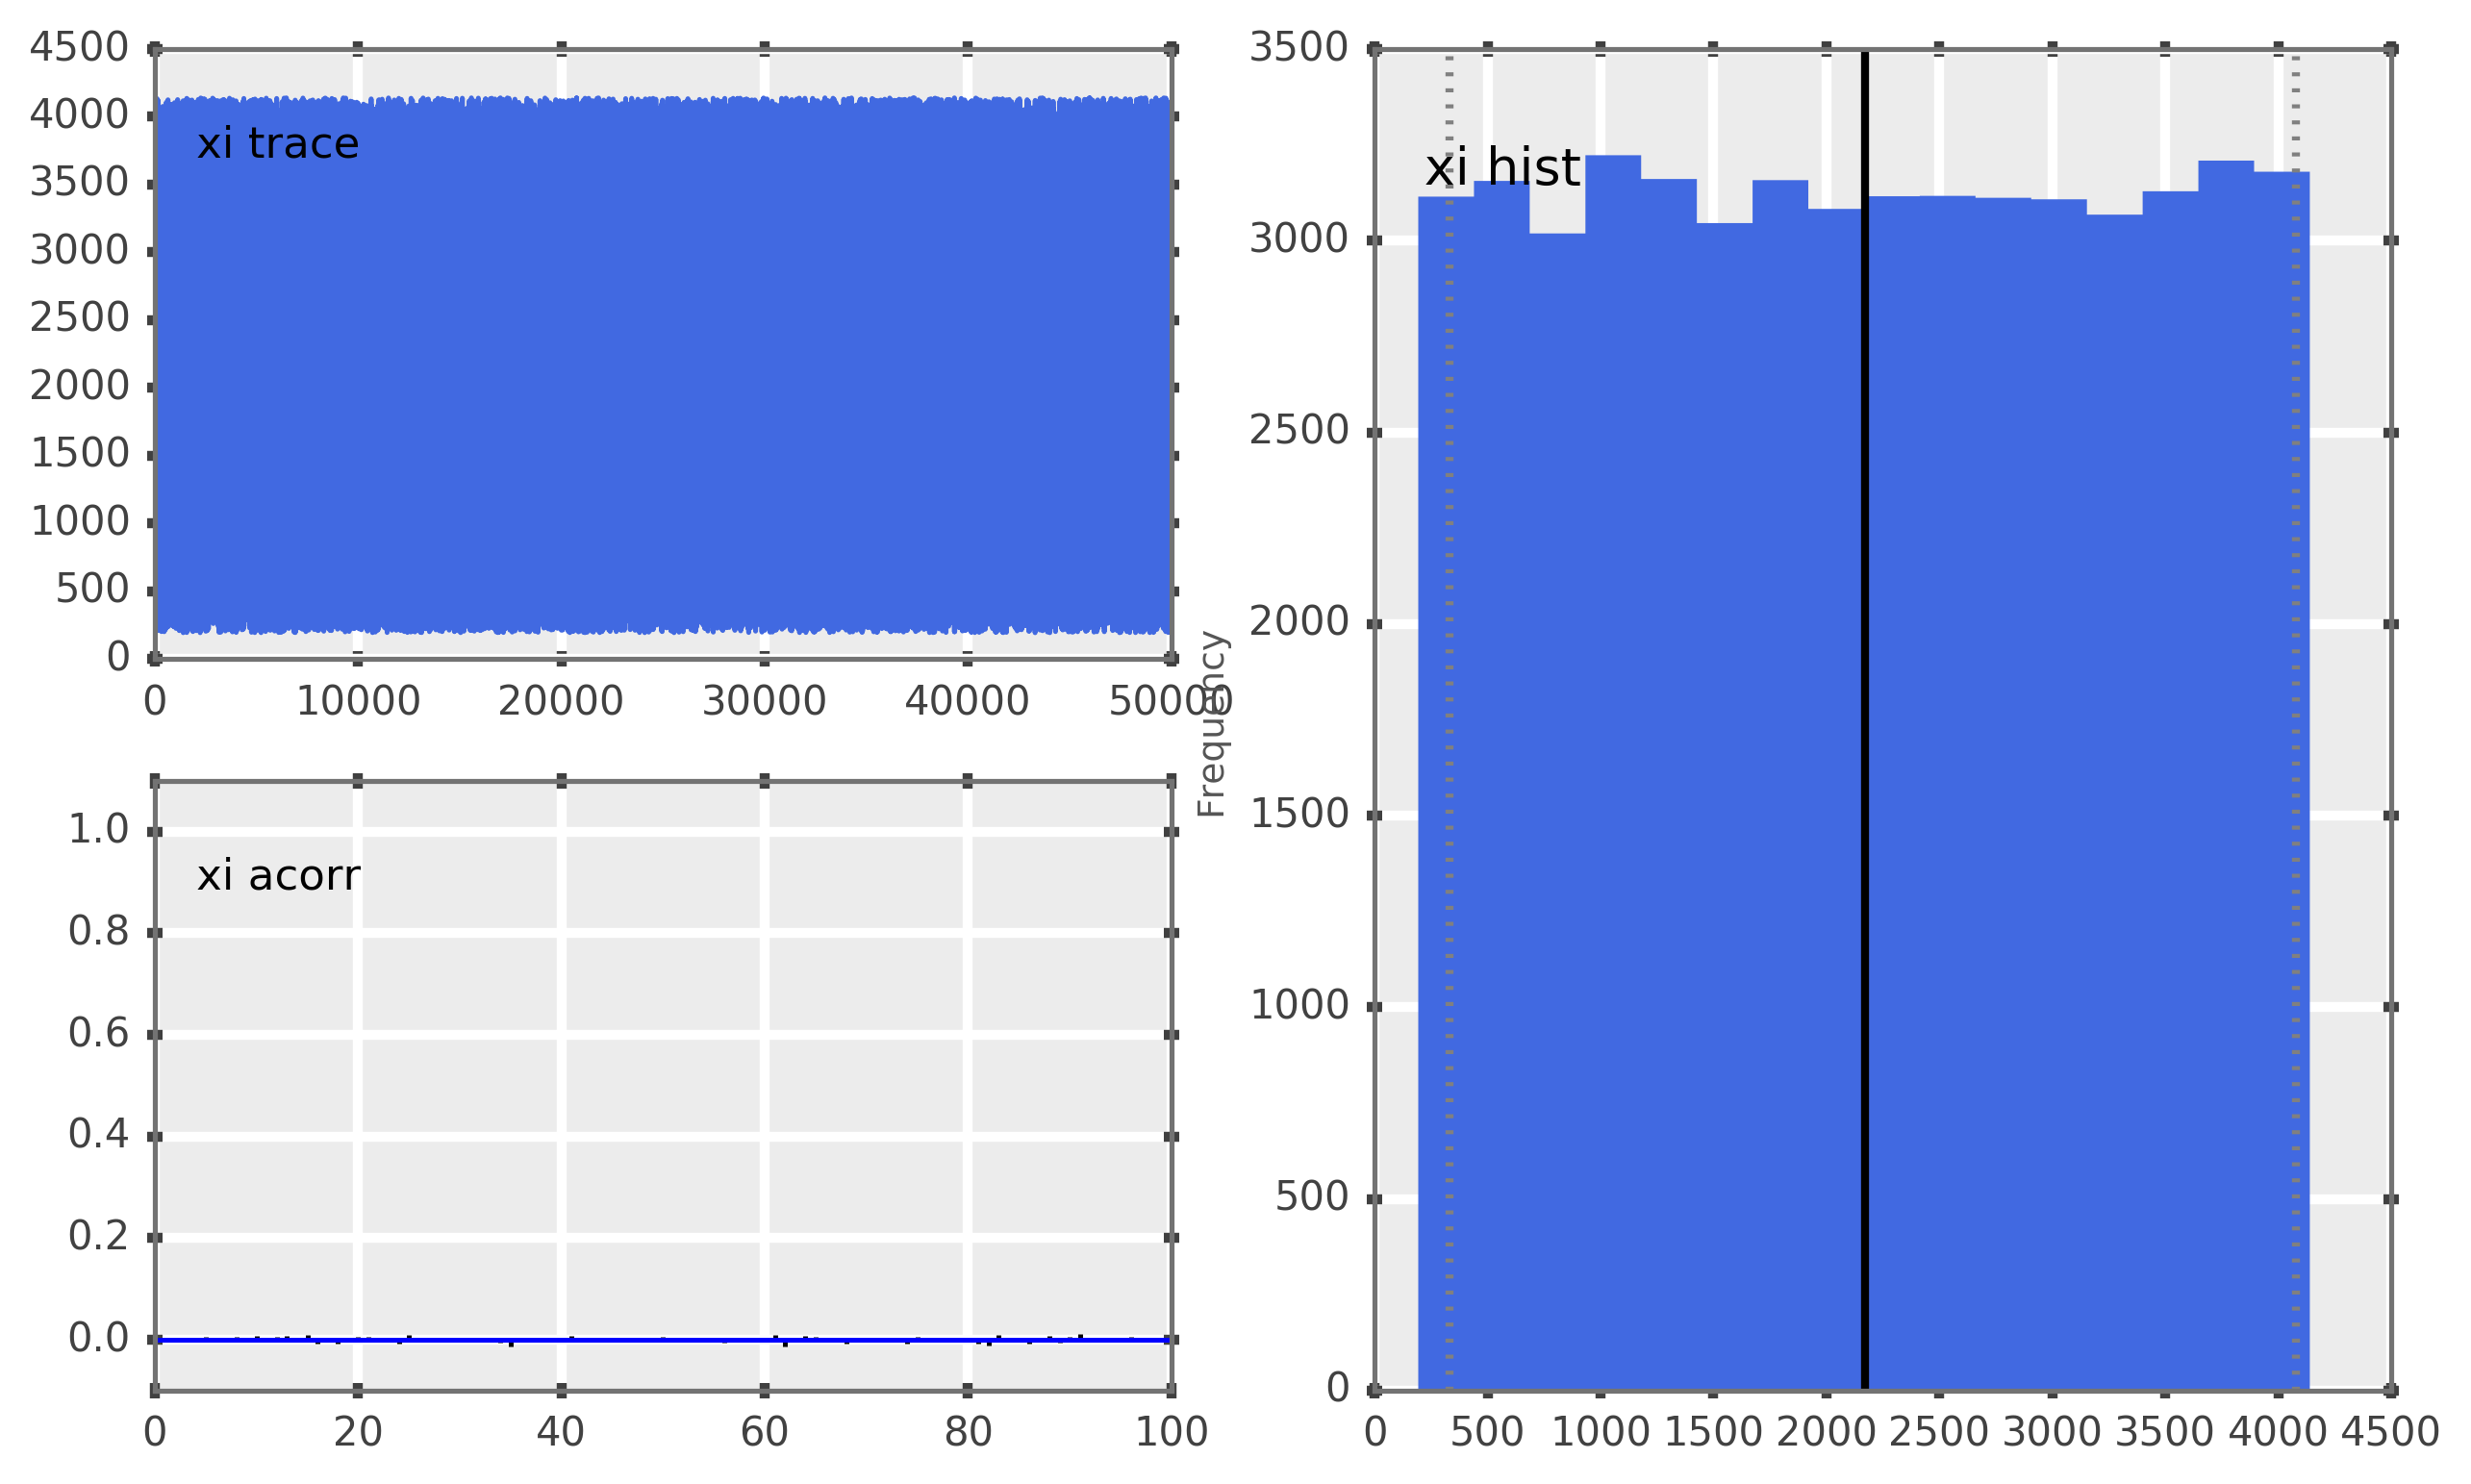

In [15]:
pprint(model.stats())
pymc.Matplot.plot(model)

In [16]:
model.variables

{<pymc.distributions.new_dist_class.<locals>.new_class 'xi' at 0x11a3b6860>,
 <pymc.PyMCObjects.Deterministic 'alpha' at 0x11a3b6828>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'kappa' at 0x1219bce80>}

## That didn't seem to work, try Weibull first


In [68]:
# Define the priors for the location (xi), scale (alpha) and shape (kappa)
# parameters.

scale = pymc.Uniform('scale', lower=0, upper=10, doc='Scale')
shape = pymc.Uniform('shape', lower=0, upper=10, doc='Shape')

weibull = pymc.Weibull('weibull', observed=True, alpha=scale, beta=shape, doc='Weibull', value=data_mcmc)

w2 = pymc.Weibull('weibull', alpha=scale, beta=shape, doc='W2')


In [69]:
model = pymc.MCMC((scale, shape, weibull, w2))


In [70]:
model.sample(iter=100000, verbose=True, burn_till_tuned=True)

burn_til_tuned is True. tune_throughout is set to False
	Tuning at iteration 1000
	Metropolis_scale tuning:
		value: 0.18472863995215924
		acceptance rate: 0.011
		adaptive scale factor: 0.5

	Metropolis_shape tuning:
		value: 9.976257443333061
		acceptance rate: 0.023
		adaptive scale factor: 0.5

	Tuning at iteration 2000
	Metropolis_scale tuning:
		value: 0.18798001834551215
		acceptance rate: 0.008
		adaptive scale factor: 0.25

	Metropolis_shape tuning:
		value: 9.736811754600772
		acceptance rate: 0.041
		adaptive scale factor: 0.25

	Tuning at iteration 3000
	Metropolis_scale tuning:
		value: 0.1920957835669014
		acceptance rate: 0.013
		adaptive scale factor: 0.125

	Metropolis_shape tuning:
		value: 9.91651905591799
		acceptance rate: 0.092
		adaptive scale factor: 0.225

	Tuning at iteration 4000
	Metropolis_scale tuning:
		value: 0.1912887794762632
		acceptance rate: 0.026
		adaptive scale factor: 0.0625

	Metropolis_shape tuning:
		value: 9.96484928553507
		acceptance rate:

Plotting scale
Plotting shape
Plotting weibull


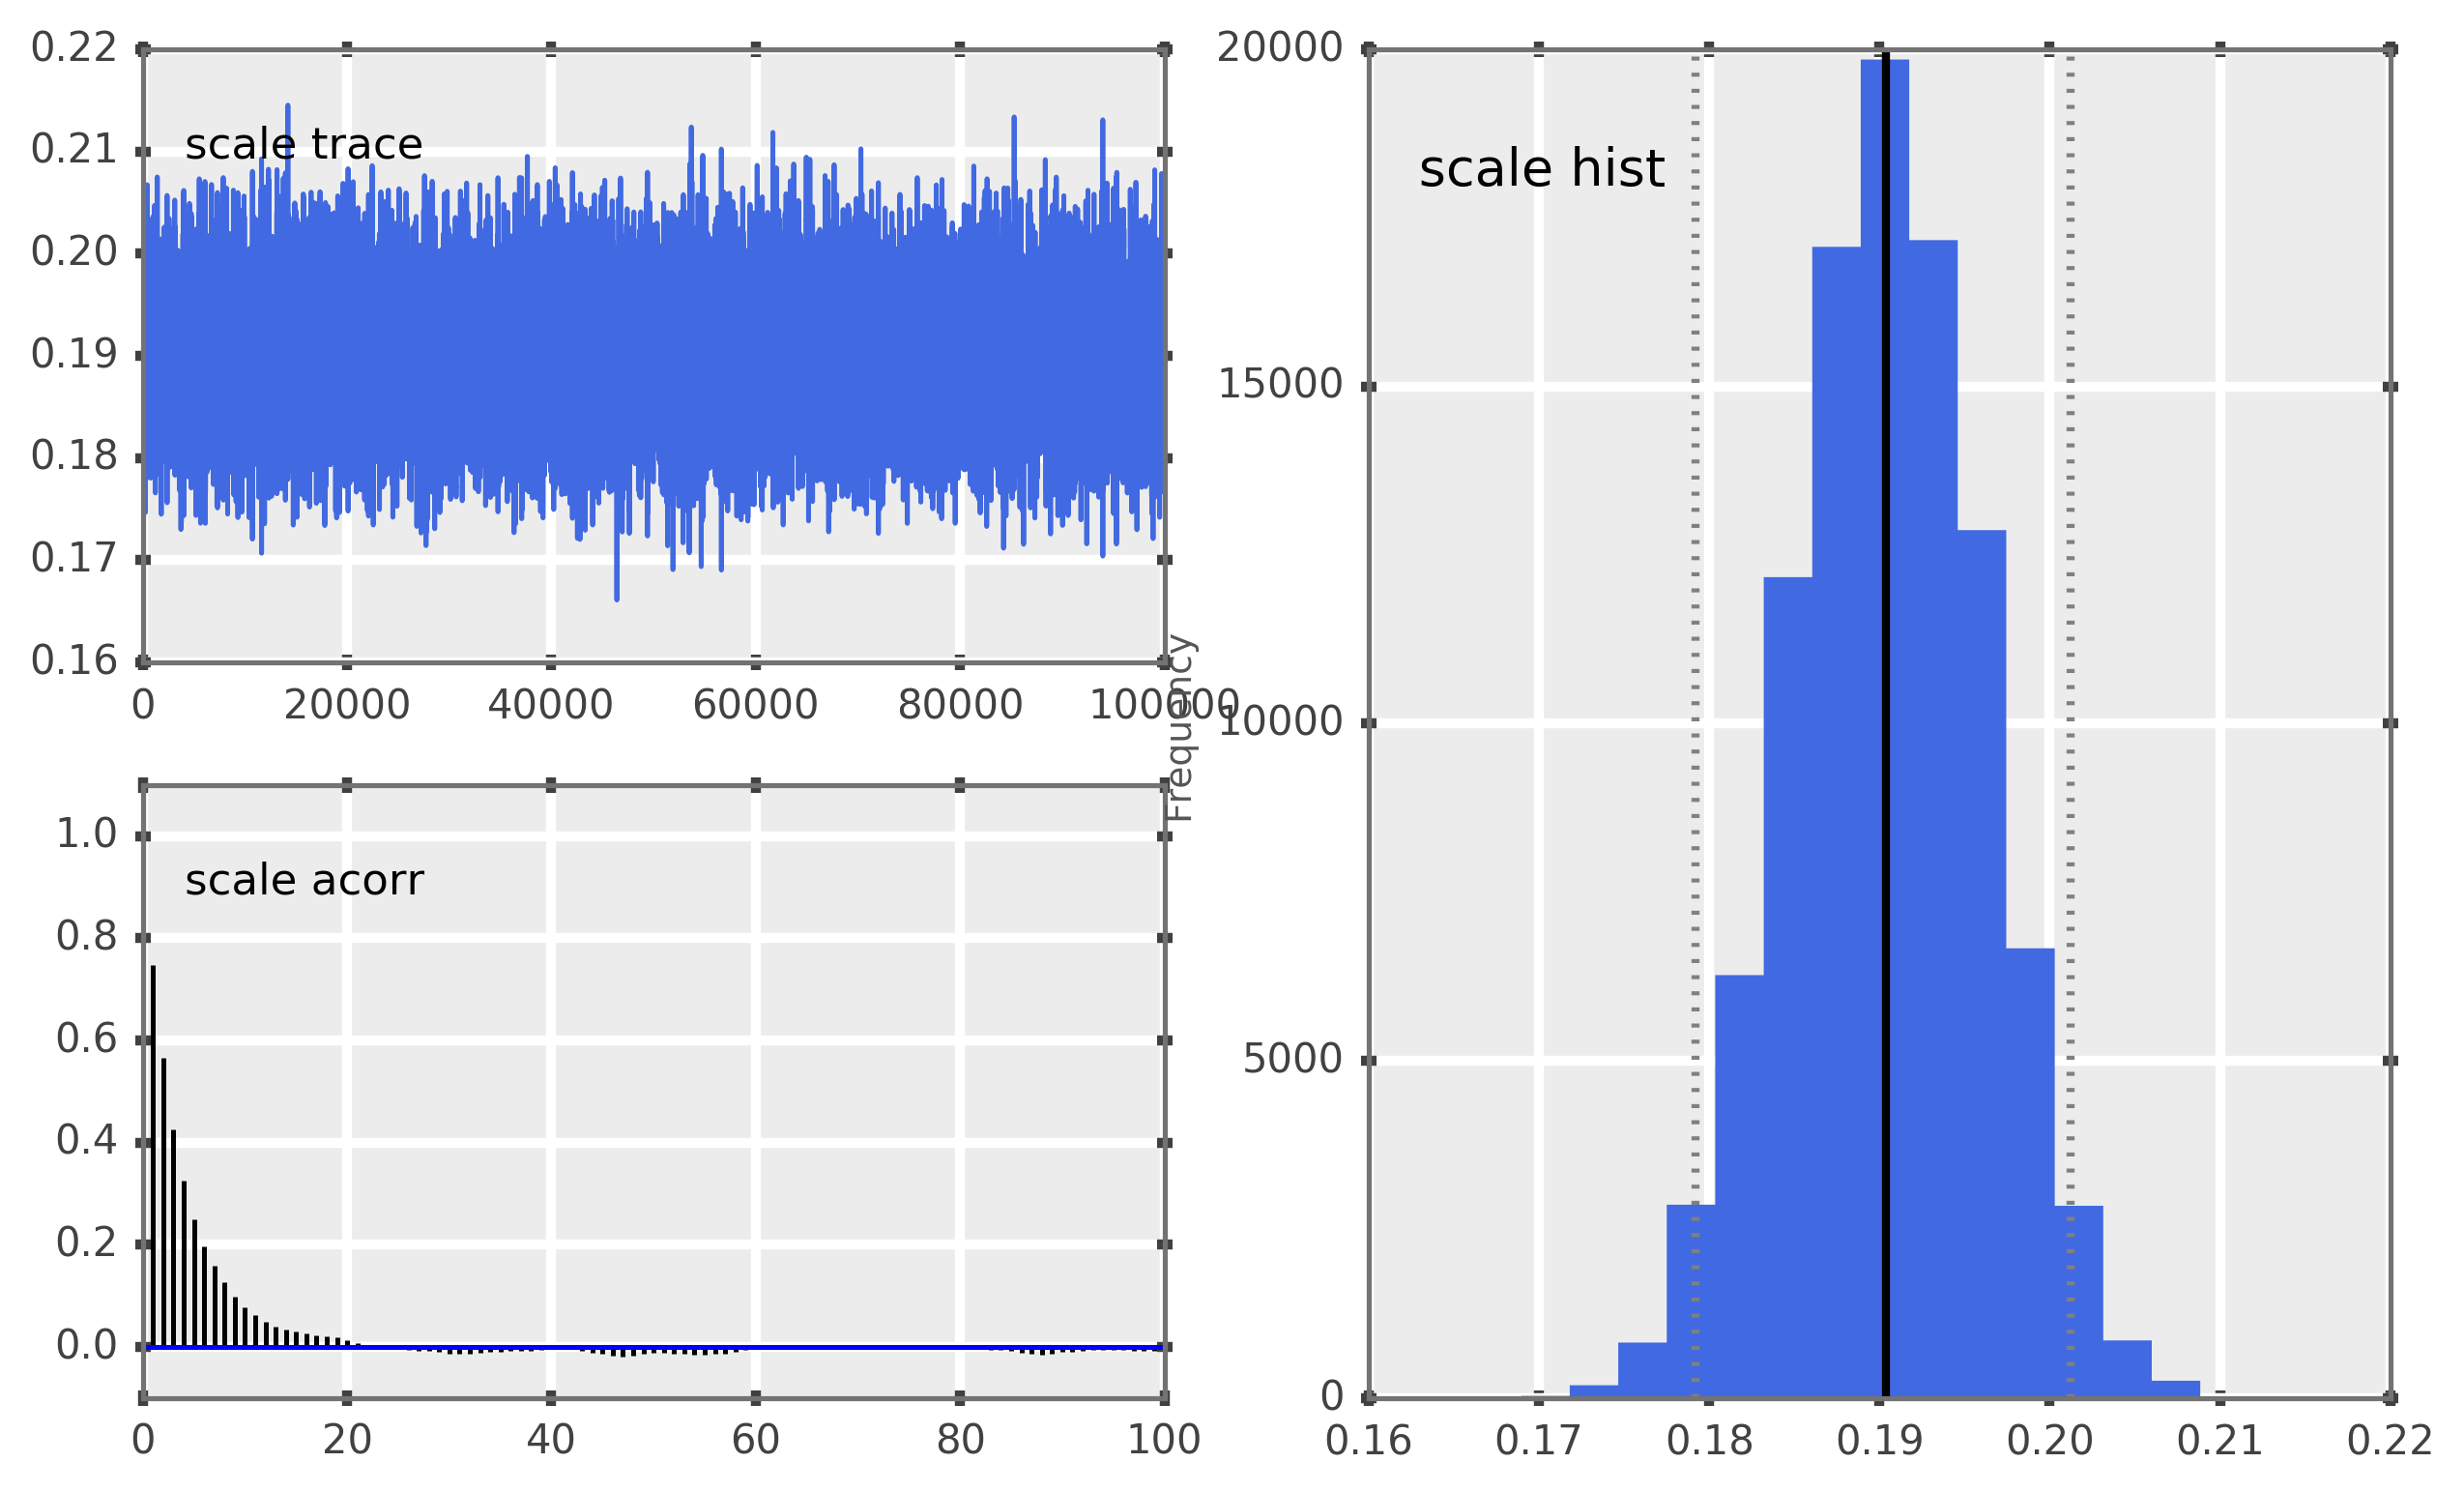

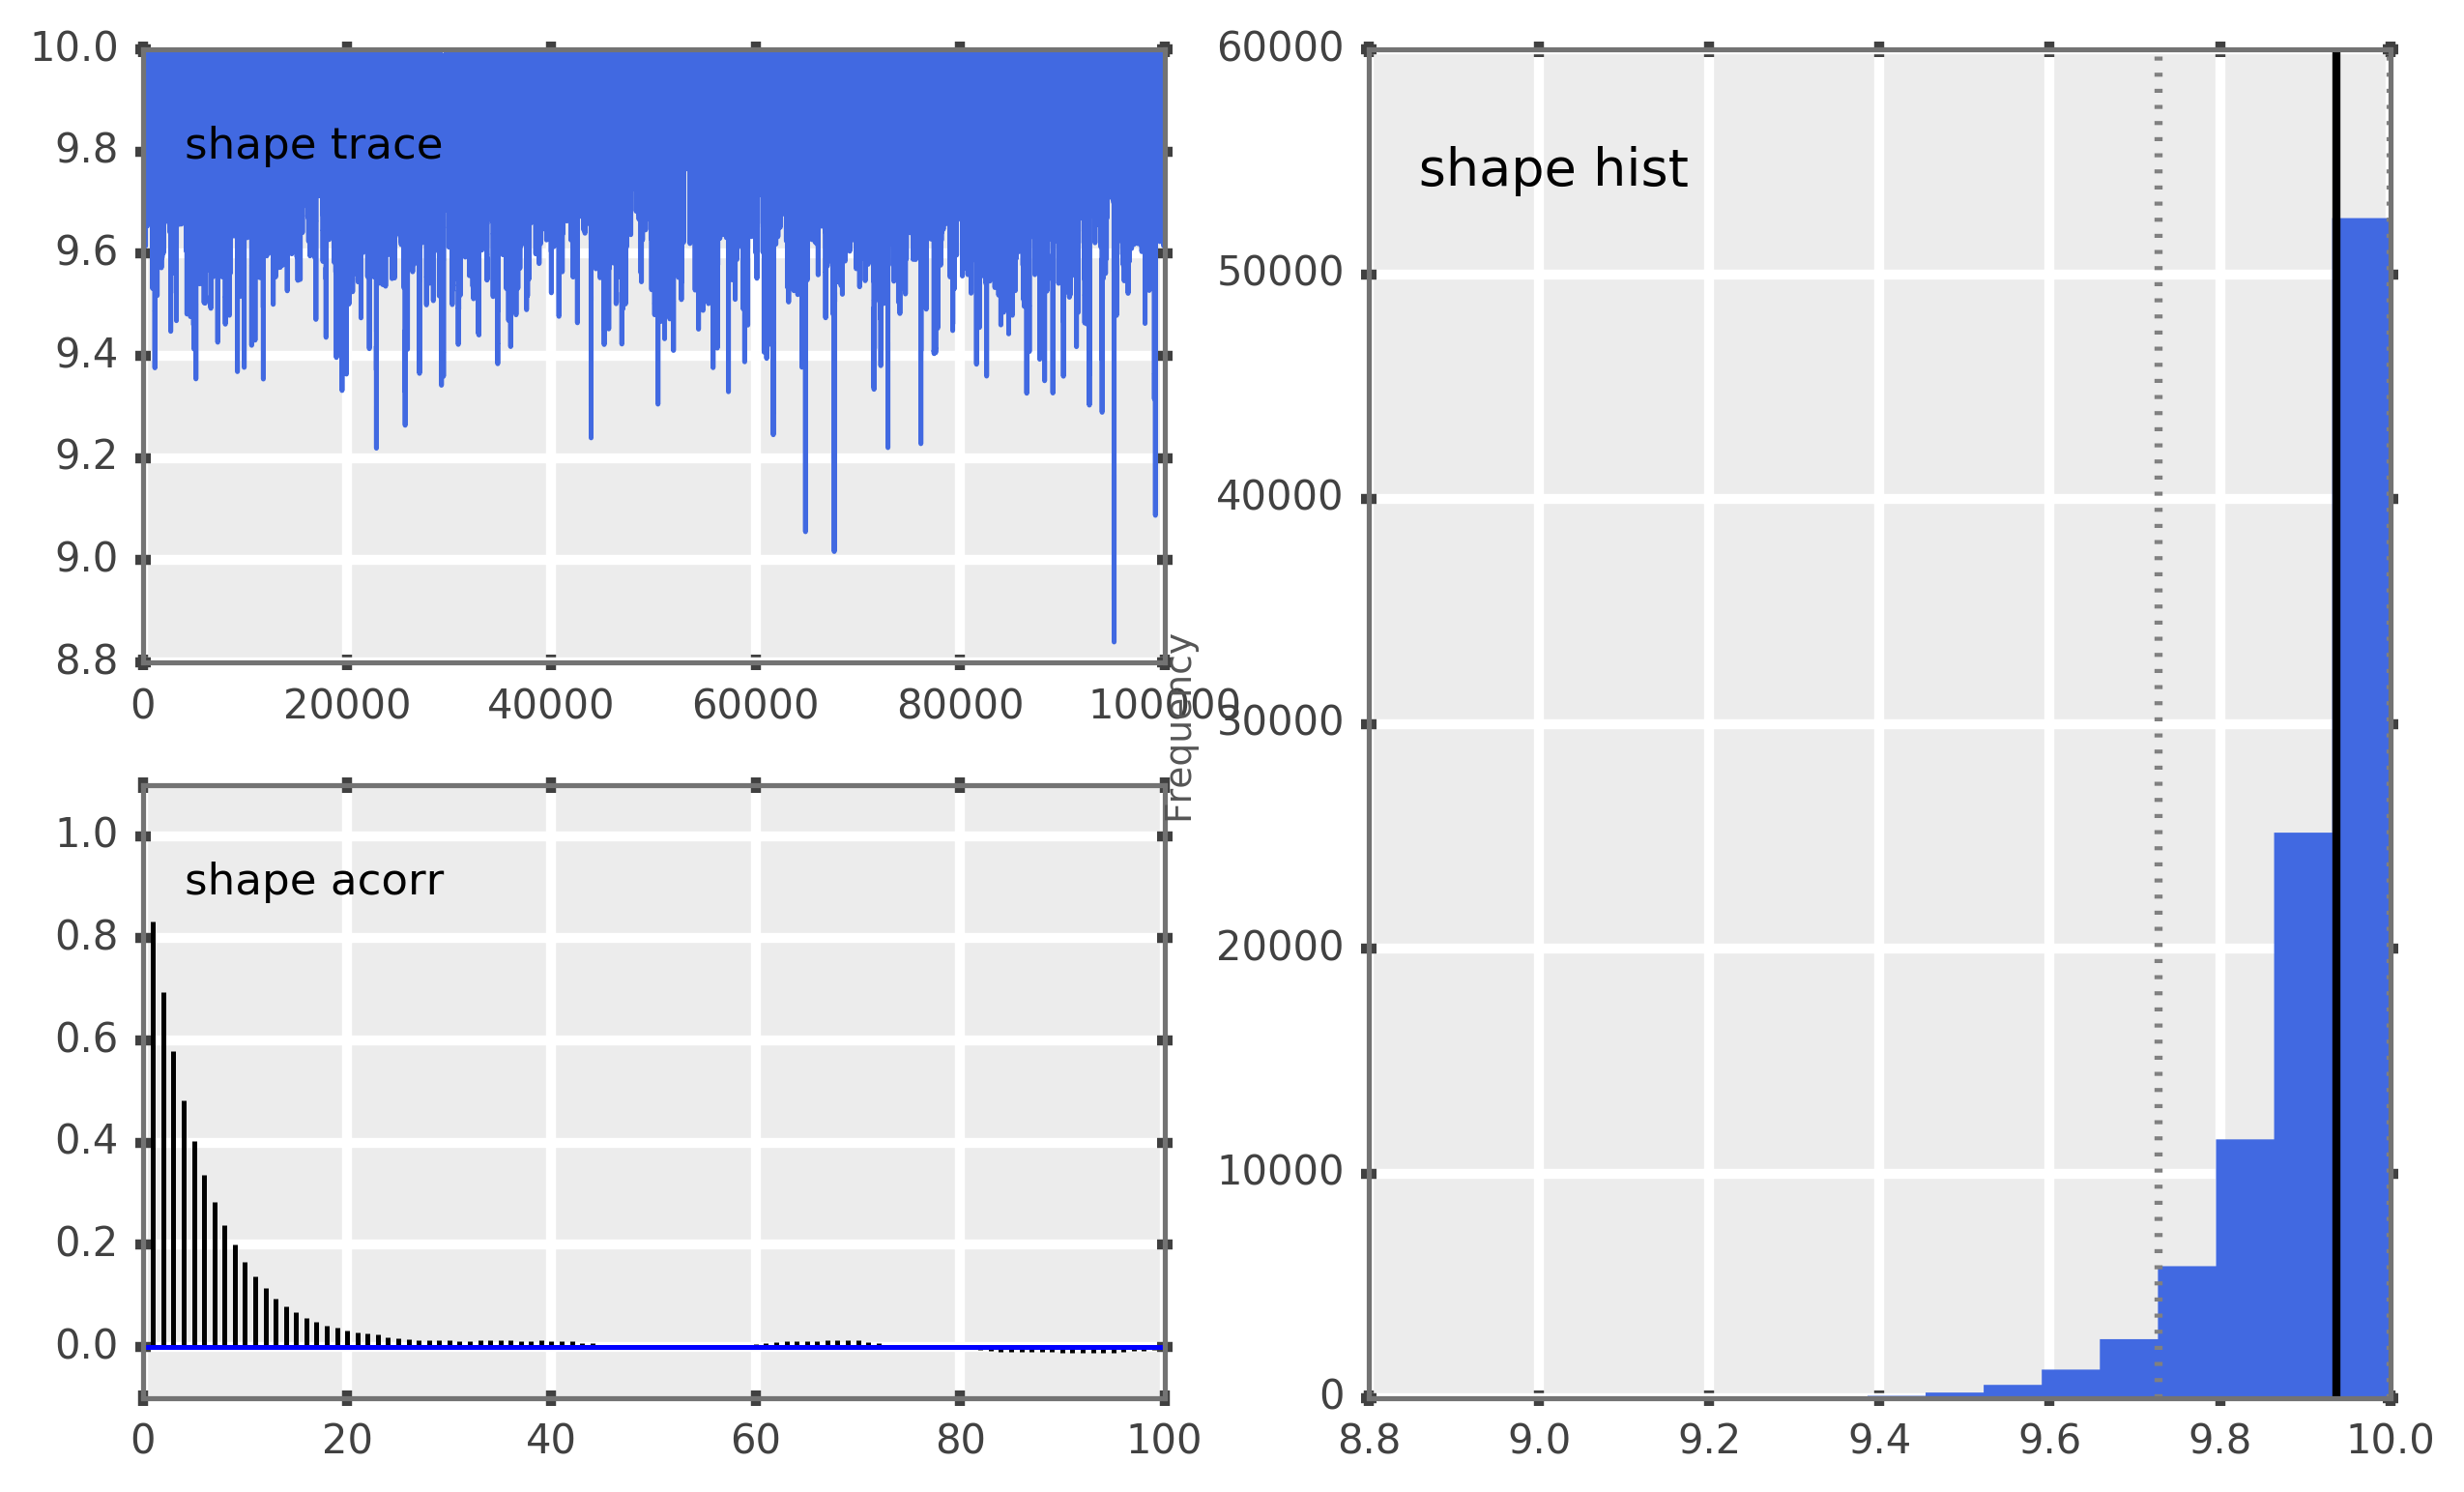

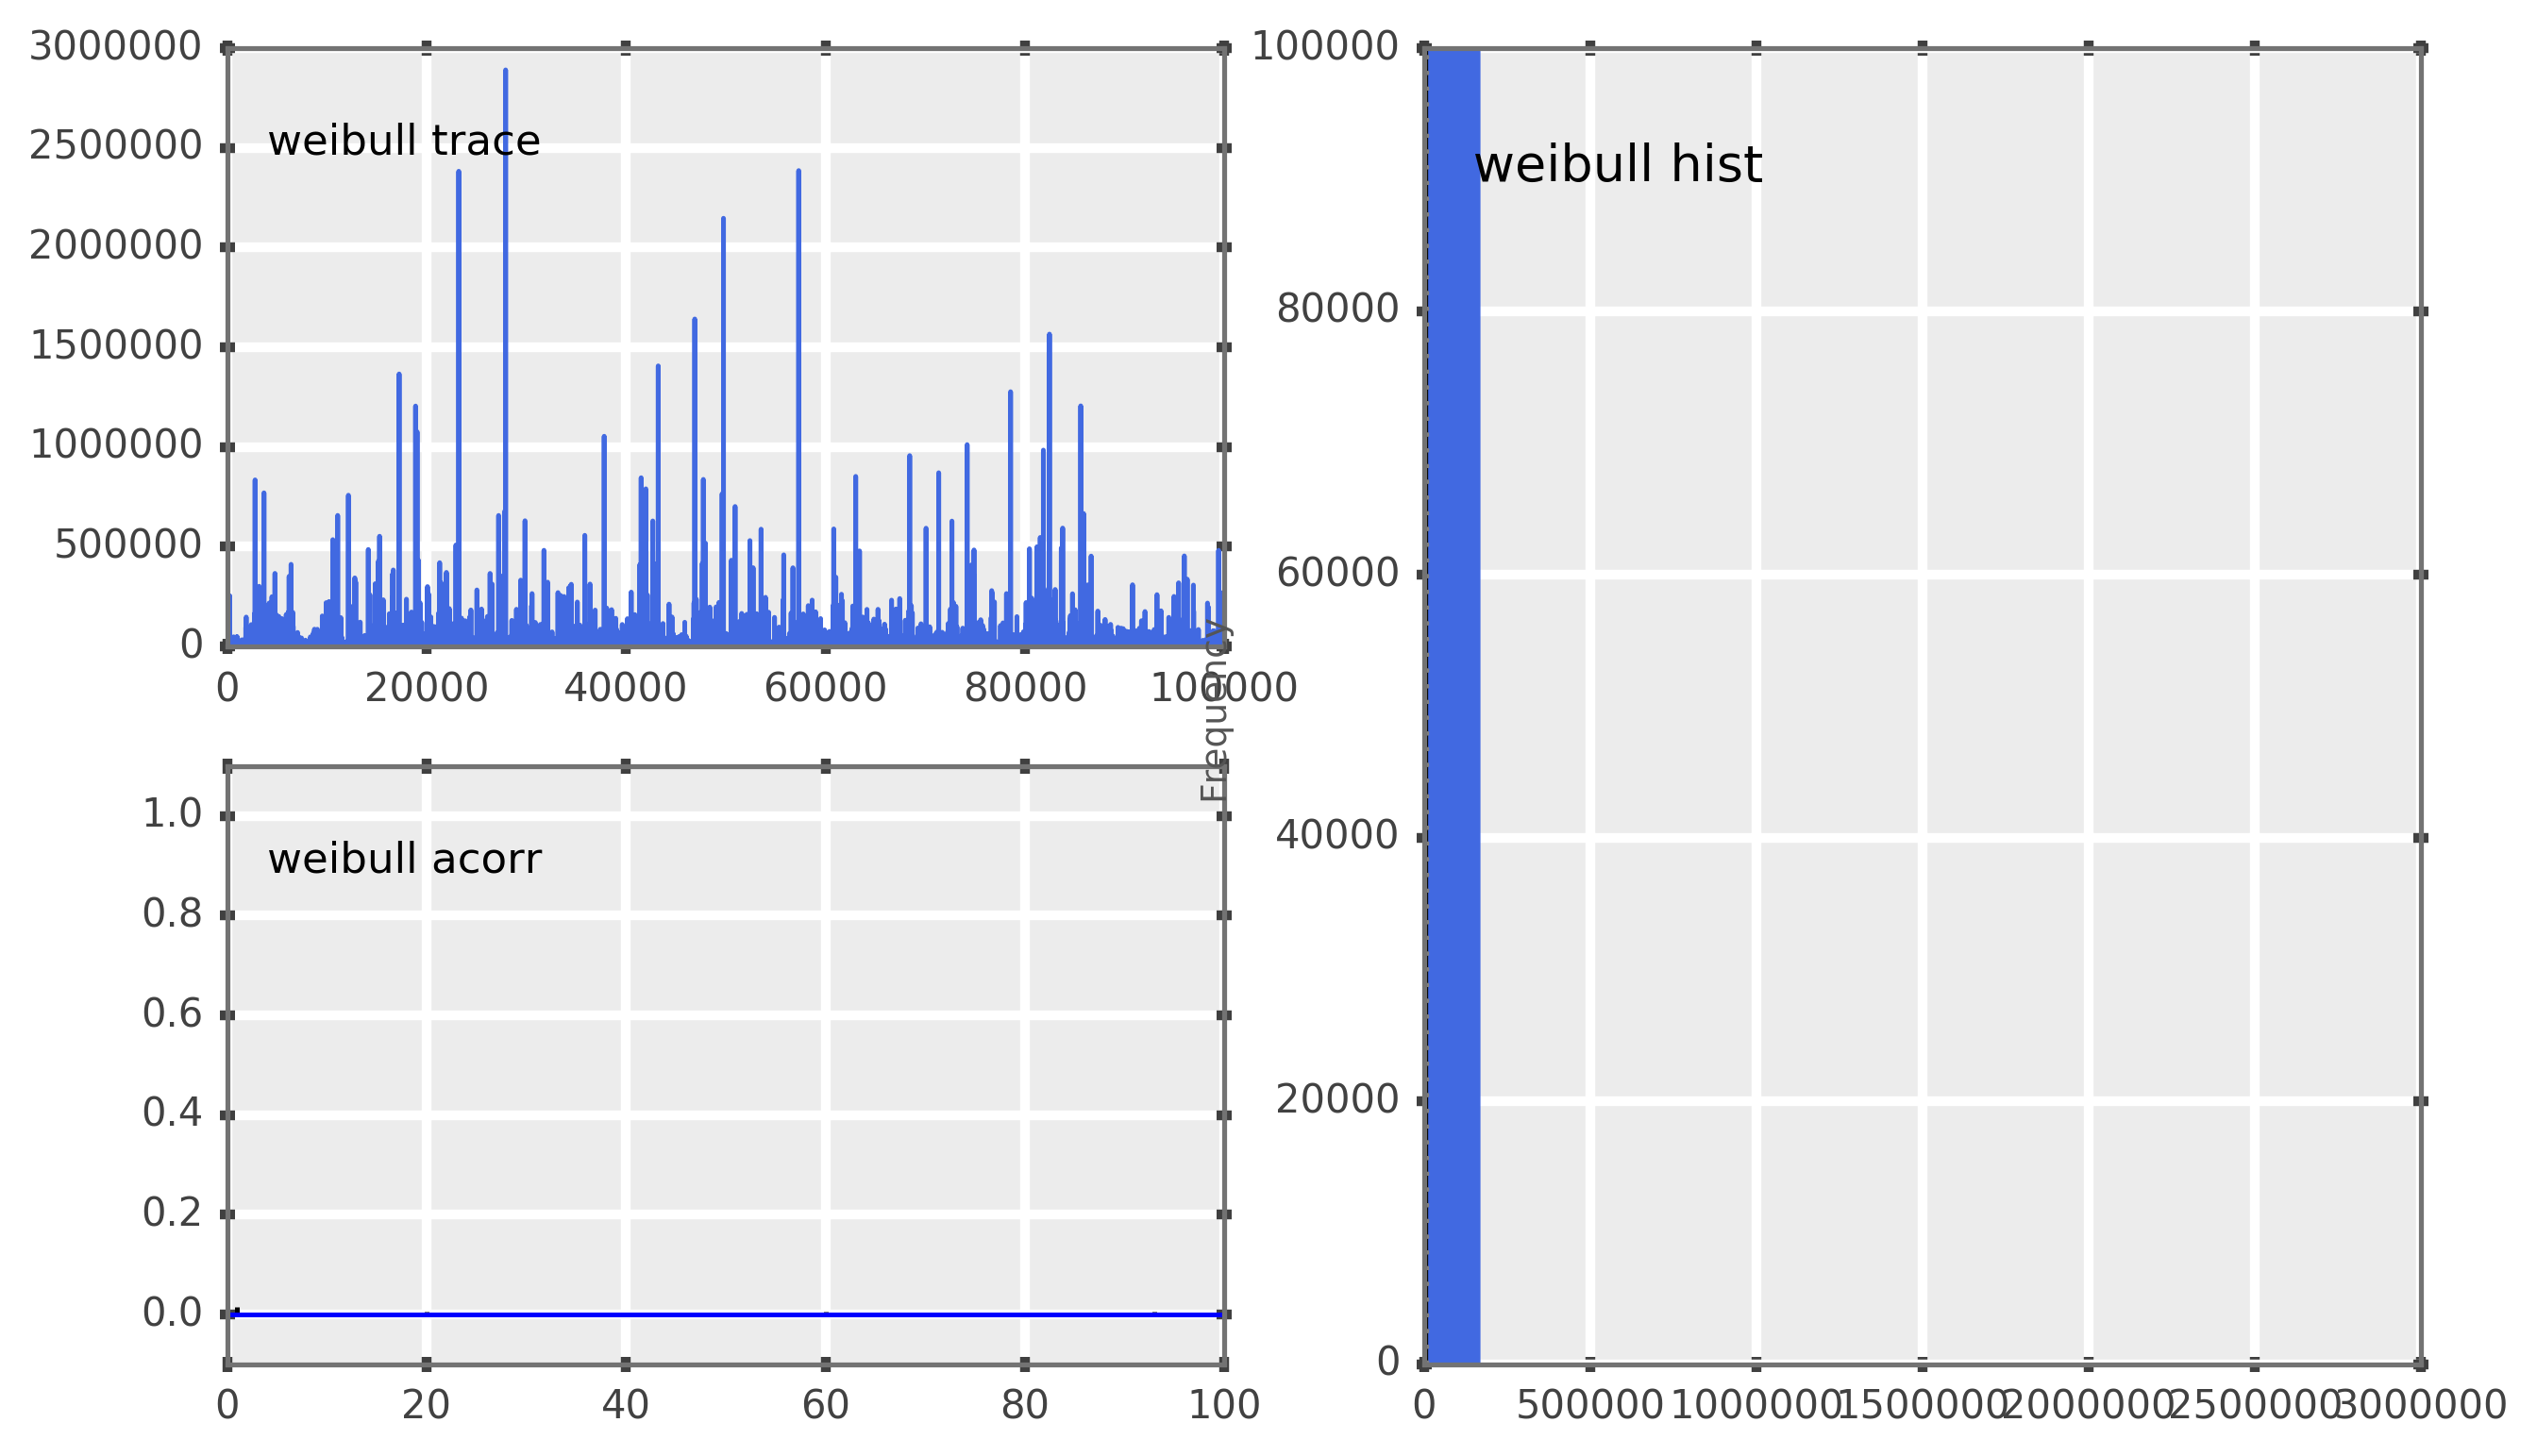

In [71]:
pymc.Matplot.plot(model)

In [72]:
pprint(model.stats())


{'scale': {'95% HPD interval': array([ 0.17921939,  0.20122722]),
           'mc error': 4.551346465436095e-05,
           'mean': 0.19040675244680214,
           'n': 100000,
           'quantiles': {2.5: 0.17940685660144831,
                         25: 0.18655966348977662,
                         50: 0.19036585482762264,
                         75: 0.19430330212525918,
                         97.5: 0.20144095976942827},
           'standard deviation': 0.0056584132902850878},
 'shape': {'95% HPD interval': array([ 9.72765079,  9.9999984 ]),
           'mc error': 0.0010401796152037963,
           'mean': 9.908435316676913,
           'n': 100000,
           'quantiles': {2.5: 9.6654178872233381,
                         25: 9.8727530972352451,
                         50: 9.9367155433403589,
                         75: 9.9733091150709772,
                         97.5: 9.9976843480341664},
           'standard deviation': 0.090772760421485701},
 'weibull': {'95% HPD interval': a

### plot up the weibul dist and the data

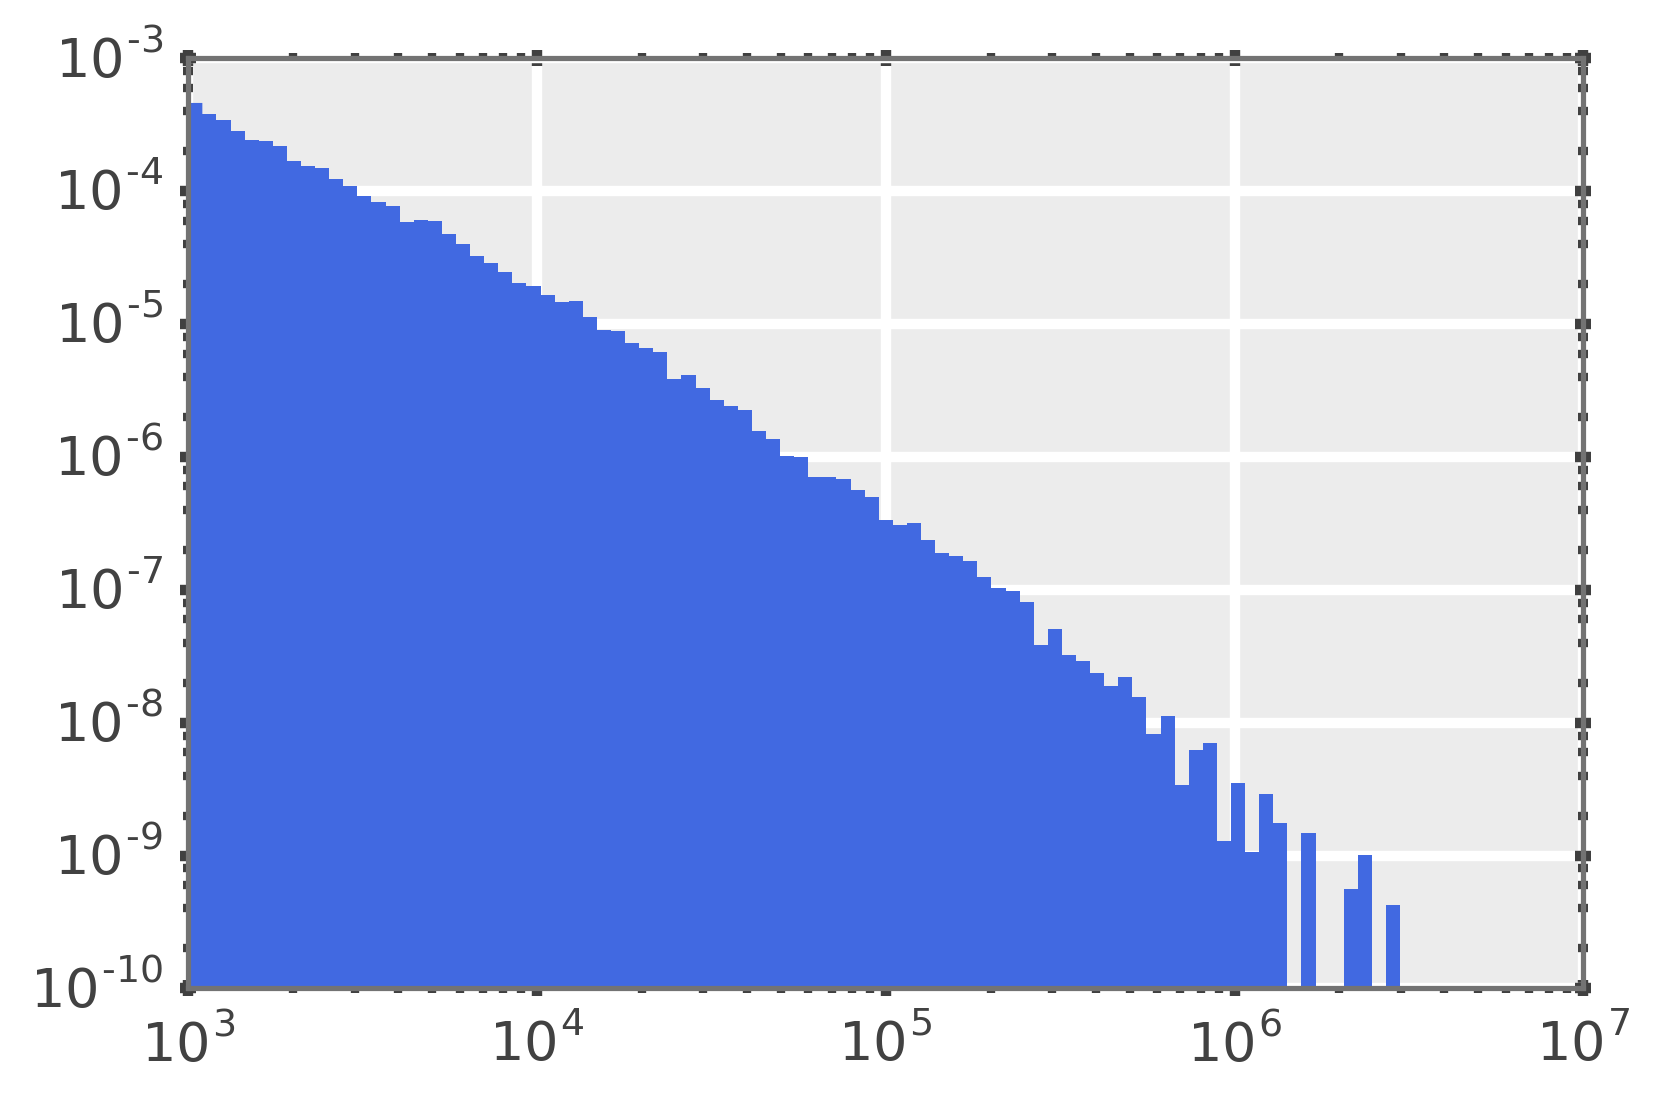

In [83]:
predictive_traces = model.trace("weibull")[:]
plt.hist(predictive_traces, tb.logspace(1e3, 1e7, 100), normed=True)
plt.yscale('log')
plt.xscale('log')



In [93]:
hi,bi = np.histogram(predictive_traces, tb.logspace(1e3, 1e7, 100), normed=True)


In [94]:
import scipy.integrate
ans = []
for ii, b in enumerate(bi[1:],1):
    ans.append(scipy.integrate.trapz(hi[:ii],bi[:ii],))

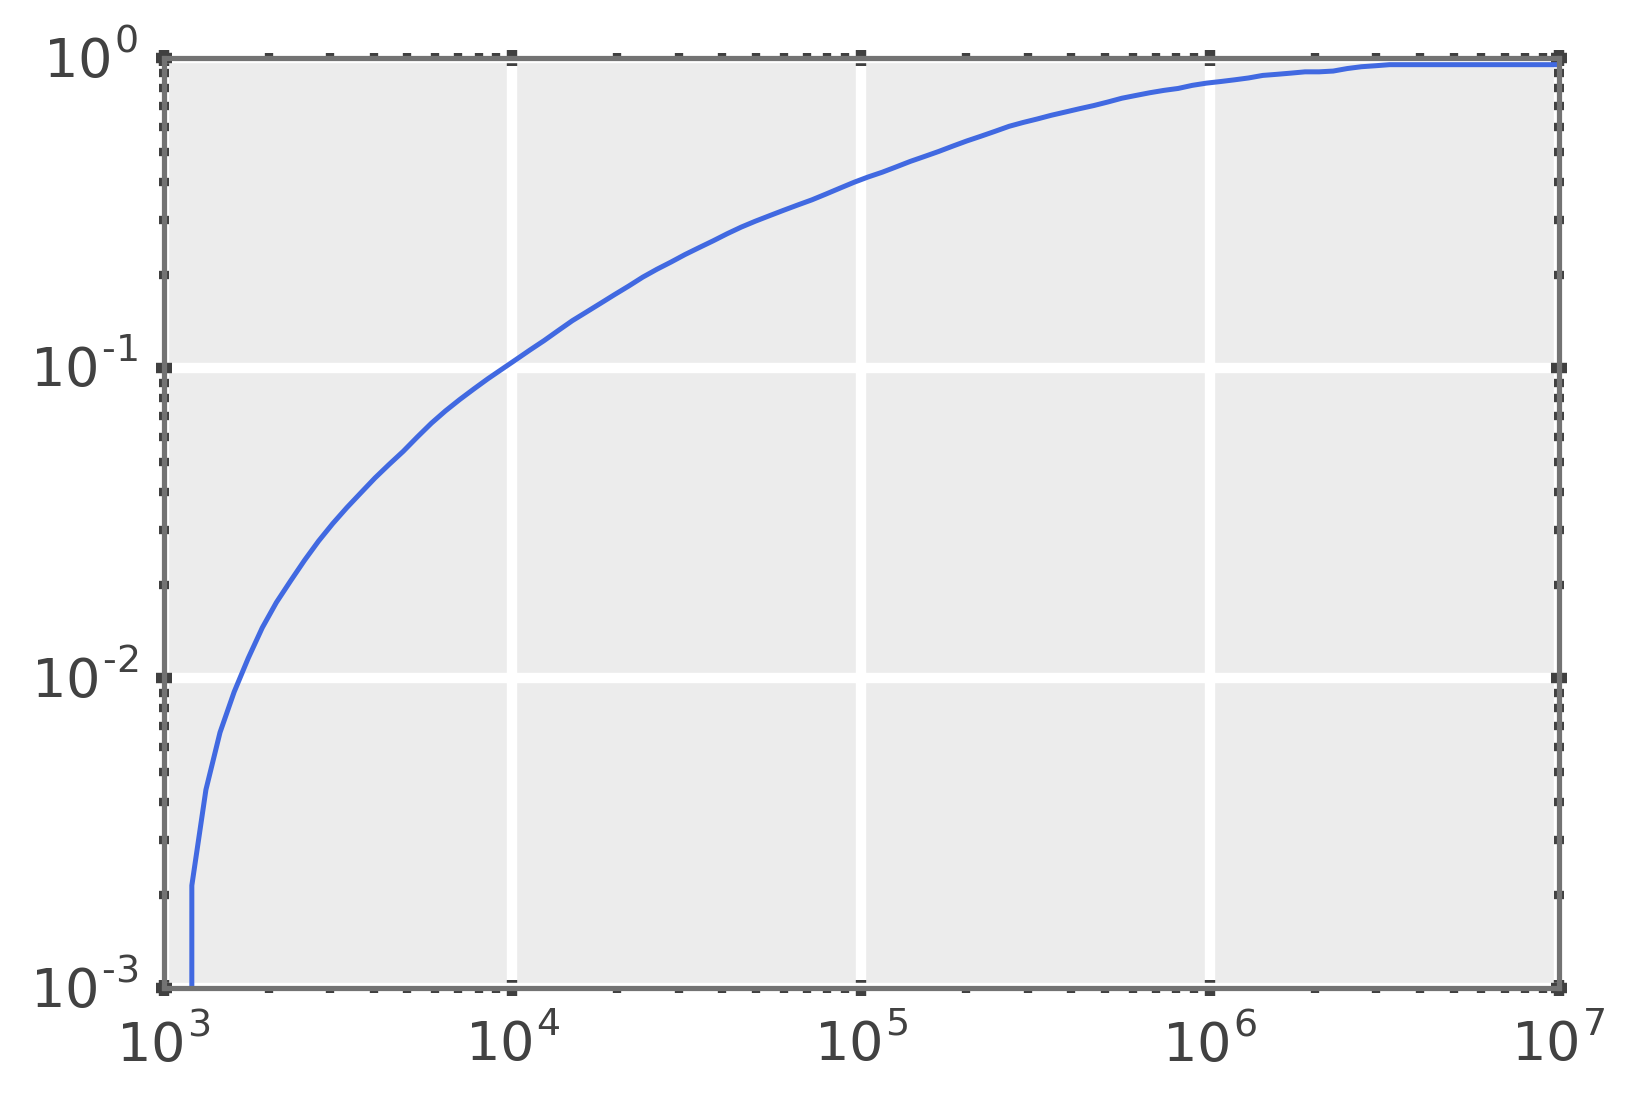

In [98]:
plt.plot(bi[1:], ans)
plt.xscale('log')
plt.yscale('log')